In [1]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


# ------------------------------------------------------------
# Function to one-hot encode the words
# ------------------------------------------------------------
def one_hot(ind, vocab_size):
    rec = np.zeros(vocab_size)
    rec[ind] = 1
    return rec

In [3]:


# ----------------------------------------------------------------------
# Function to create the training data from the corpus
# ----------------------------------------------------------------------
def create_training_data(corpus_raw, WINDOW_SIZE=2):
    words_list = []

    for sent in corpus_raw.split('.'):
        for w in sent.split():
            if w != '.':
                words_list.append(w.split('.')[0])  # Remove if delimiter is tied to the end of a word

    words_list = set(words_list)  # Remove the duplicates for each word

    word2ind = {}  # Define the dictionary for converting a word to index

    ind2word = {}  # Define dictionary for retrieving a word from its index

    vocab_size = len(words_list)  # Count of unique words in the vocabulary

    for i, w in enumerate(words_list):  # Build the dictionaries
        word2ind[w] = i
        ind2word[i] = w

    print(word2ind)
    sentences_list = corpus_raw.split('.')
    sentences = []

    for sent in sentences_list:
        sent_array = sent.split()
        sent_array = [s.split('.')[0] for s in sent_array]
        sentences.append(sent_array)  # finally sentences would hold arrays of word array for sentences

    data_recs = []  # Holder for the input output record

    for sent in sentences:
        for ind, w in enumerate(sent):
            for nb_w in sent[max(ind - WINDOW_SIZE, 0): min(ind + WINDOW_SIZE,
                                                            len(sent)) + 1]:
                if nb_w != w:
                    data_recs.append([w, nb_w])

    x_train, y_train = [], []

    for rec in data_recs:
        x_train.append(one_hot(word2ind[rec[0]], vocab_size))
        y_train.append(one_hot(word2ind[rec[1]], vocab_size))

    return x_train, y_train, word2ind, ind2word, vocab_size


In [4]:
corpus_raw = "Deep Learning has evolved from Artificial Neural Networks, which has been there since the 1940s. " \
             "Neural Networks are interconnected networks of processing unitscalled artificial neurons that loosely mimic axons in a biological brain. " \
             "In a biological neuron, the dendrites receive input signals from various neighboring neurons, typically greater than 1000. " \
             "These modified signals are then passed on to the cell body or soma of the neuron, where these signals are summed together and then passed on to the axon of the neuron. " \
             "If the received input signal is more than a specified threshold, the axon will release a signal which again will pass on to neighboring dendrites of other neurons. " \
             "Figure 2-1 depicts the structure of a biological neuron for reference. " \
             "The artificial neuron units are inspired by the biological neurons with some modifications as per convenience. " \
             "Much like the dendrites, the input connections to the neuron carry the attenuated or amplified input signals from other neighboring neurons. " \
             "The signals are passed on to the neuron, where the input signals are summed up and then a decision is taken what to output based on the total input received. " \
             "For instance, for a binary threshold neuron an output value of 1 is provided when the total input exceeds a pre-defined threshold; otherwise, the output stays at 0. " \
             "Several other types of neurons are used in artificial neural networks, and their implementation only differs with respect to the activation function on the total input to produce the neuron output. " \
             "In Figure 2-2 the different biological equivalents are tagged in the artificial neuron for easy analogy and interpretation."

corpus_raw = corpus_raw.lower()
x_train, y_train, word2ind, ind2word, vocab_size = create_training_data(corpus_raw, 2)


{'binary': 0, 'inspired': 1, 'been': 2, 'provided': 3, 'tagged': 4, 'depicts': 5, 'exceeds': 6, 'dendrites,': 7, 'per': 8, 'that': 9, 'since': 10, 'used': 11, 'other': 12, 'structure': 13, 'than': 14, 'up': 15, '1000': 16, 'processing': 17, 'greater': 18, 'as': 19, 'input': 20, 'mimic': 21, 'differs': 22, 'like': 23, 'output': 24, 'will': 25, 'artificial': 26, 'a': 27, 'pre-defined': 28, '0': 29, 'there': 30, 'unitscalled': 31, 'modified': 32, 'typically': 33, 'signals': 34, 'an': 35, 'some': 36, 'evolved': 37, 'with': 38, 'connections': 39, 'amplified': 40, 'axons': 41, 'what': 42, 'convenience': 43, 'from': 44, 'brain': 45, 'of': 46, 'are': 47, 'function': 48, 'neighboring': 49, 'these': 50, 'at': 51, 'passed': 52, 'threshold,': 53, 'again': 54, 'neuron': 55, 'stays': 56, 'dendrites': 57, 'body': 58, 'various': 59, 'signal': 60, 'figure': 61, 'networks,': 62, 'their': 63, 'for': 64, 'based': 65, 'attenuated': 66, 'neurons,': 67, 'value': 68, 'several': 69, '2-2': 70, 'on': 71, 'neuro

was here
epoch: 0 loss : 4.8529983
epoch: 0 loss :

 4.843825
epoch: 0 loss : 4.834483
epoch: 0 loss : 4.8248644
epoch: 0 loss : 4.8148575
epoch: 0 loss : 4.8043566
epoch: 0 loss : 4.793268
epoch: 0 loss : 4.7815094
epoch: 0 loss : 4.769009
epoch: 0 loss : 4.755698
epoch: 0 loss : 4.741516
epoch: 0 loss : 4.7264013
epoch: 0 loss : 4.7103004
epoch: 0 loss : 4.69316
epoch: 0 loss : 4.6749306
epoch: 0 loss : 4.6555634
epoch: 0 loss : 4.6350164
epoch: 0 loss : 4.613246
epoch: 0 loss : 4.59021
epoch: 0 loss : 4.5658684
epoch: 0 loss : 4.5401855
epoch: 0 loss : 4.513122
epoch: 0 loss : 4.484644
epoch: 0 loss : 4.454717
epoch: 0 loss : 4.4233103
epoch: 0 loss : 4.3903923
epoch: 0 loss : 4.3559356
epoch: 0 loss : 4.3199153
epoch: 0 loss : 4.2823086
epoch: 0 loss : 4.243098
epoch: 0 loss : 4.202265
epoch: 0 loss : 4.1598005
epoch: 0 loss : 4.115696
epoch: 0 loss : 4.0699506
epoch: 0 loss : 4.0225663
epoch: 0 loss : 3.9735503
epoch: 0 loss : 3.9229188
epoch: 0 loss : 3.8706908
epoch: 0 loss : 3.816896
epoch: 0 loss : 3.7615688
epoch: 0 loss : 3.7

1.6470394
epoch: 0 loss : 1.6392081
epoch: 0 loss : 1.631994
epoch: 0 loss : 1.6253372
epoch: 0 loss : 1.6191823
epoch: 0 loss : 1.6134781
epoch: 0 loss : 1.6081789
epoch: 0 loss : 1.6032416
epoch: 0 loss : 1.5986288
epoch: 0 loss : 1.5943053
epoch: 0 loss : 1.5902401
epoch: 1 loss : 1.5864044
epoch: 1 loss : 1.5827732
epoch: 1 loss : 1.5793232
epoch: 1 loss : 1.5760348
epoch: 1 loss : 1.5728893
epoch: 1 loss : 1.5698706
epoch: 1 loss : 1.5669641
epoch: 1 loss : 1.5641572
epoch: 1 loss : 1.5614386
epoch: 1 loss : 1.558798
epoch: 1 loss : 1.5562267
epoch: 1 loss : 1.5537167
epoch: 1 loss : 1.5512615
epoch: 1 loss : 1.5488542
epoch: 1 loss : 1.5464897
epoch: 1 loss : 1.544163
epoch: 1 loss : 1.5418694
epoch: 1 loss : 1.5396049
epoch: 1 loss : 1.5373666
epoch: 1 loss : 1.5351503
epoch: 1 loss : 1.5329531
epoch: 1 loss : 1.5307724
epoch: 1 loss : 1.5286052
epoch: 1 loss : 1.5264494
epoch: 1 loss : 1.524303
epoch: 1 loss : 1.5221636
epoch: 1 loss : 1.5200293
epoch: 1 loss : 1.5178978
epoch:

 1 loss : 1.3683097
epoch: 1 loss : 1.3653564
epoch: 1 loss : 1.3623927
epoch: 1 loss : 1.3594195
epoch: 1 loss : 1.3564373
epoch: 1 loss : 1.3534467
epoch: 1 loss : 1.3504483
epoch: 1 loss : 1.3474427
epoch: 1 loss : 1.3444312
epoch: 1 loss : 1.3414133
epoch: 1 loss : 1.3383907
epoch: 2 loss : 1.3353636
epoch: 2 loss : 1.3323328
epoch: 2 loss : 1.3292991
epoch: 2 loss : 1.3262633
epoch: 2 loss : 1.3232262
epoch: 2 loss : 1.3201882
epoch: 2 loss : 1.3171505
epoch: 2 loss : 1.3141135
epoch: 2 loss : 1.3110784
epoch: 2 loss : 1.3080457
epoch: 2 loss : 1.3050164
epoch: 2 loss : 1.301991
epoch: 2 loss : 1.2989705
epoch: 2 loss : 1.2959557
epoch: 2 loss : 1.2929474
epoch: 2 loss : 1.2899468
epoch: 2 loss : 1.2869537
epoch: 2 loss : 1.28397
epoch: 2 loss : 1.2809957
epoch: 2 loss : 1.2780323
epoch: 2 loss : 1.2750797
epoch: 2 loss : 1.2721394
epoch: 2 loss : 1.2692124
epoch: 2 loss : 1.2662985
epoch: 2 loss : 1.2633991
epoch: 2 loss : 1.2605149
epoch: 2 loss : 1.2576462
epoch: 2 loss : 1.254

 2 loss : 1.1443031
epoch: 2 loss : 1.1427068
epoch: 2 loss : 1.141135
epoch: 2 loss : 1.1395874
epoch: 2 loss : 1.1380641
epoch: 2 loss : 1.1365646
epoch: 2 loss : 1.1350886
epoch: 2 loss : 1.1336358
epoch: 2 loss : 1.1322058
epoch: 2 loss : 1.1307988
epoch: 2 loss : 1.1294141
epoch: 2 loss : 1.1280512
epoch: 2 loss : 1.1267102
epoch: 2 loss : 1.1253906
epoch: 2 loss : 1.1240923
epoch: 2 loss : 1.1228144
epoch: 2 loss : 1.1215575
epoch: 2 loss : 1.1203206
epoch: 2 loss : 1.1191037
epoch: 2 loss : 1.1179063
epoch: 2 loss : 1.1167284
epoch: 2 loss : 1.1155695
epoch: 3 loss : 1.1144289
epoch: 3 loss : 1.1133072
epoch: 3 loss : 1.1122034
epoch: 3 loss : 1.1111171
epoch: 3 loss : 1.1100487
epoch: 3 loss : 1.1089976
epoch: 3 loss : 1.107963
epoch: 3 loss : 1.1069453
epoch: 3 loss : 1.1059439
epoch: 3 loss : 1.1049588
epoch: 3 loss : 1.1039892
epoch: 3 loss : 1.1030352
epoch: 3 loss : 1.1020964
epoch: 3 loss : 1.1011724
epoch: 3 loss : 1.1002636
epoch: 3 loss : 1.0993688
epoch: 3 loss : 1.09

 3 loss : 1.0714686
epoch: 3 loss : 1.071007
epoch: 3 loss : 1.0705515
epoch: 3 loss : 1.0701021
epoch: 3 loss : 1.0696592
epoch: 3 loss : 1.0692222
epoch: 3 loss : 1.0687914
epoch: 3 loss : 1.0683658
epoch: 3 loss : 1.0679464
epoch: 3 loss : 1.0675327
epoch: 3 loss : 1.0671241
epoch: 3 loss : 1.0667216
epoch: 3 loss : 1.066324
epoch: 3 loss : 1.0659312
epoch: 3 loss : 1.0655445
epoch: 3 loss : 1.0651627
epoch: 3 loss : 1.0647858
epoch: 3 loss : 1.0644138
epoch: 3 loss : 1.0640461
epoch: 3 loss : 1.0636841
epoch: 3 loss : 1.0633261
epoch: 3 loss : 1.0629733
epoch: 3 loss : 1.0626246
epoch: 3 loss : 1.0622804
epoch: 3 loss : 1.0619407
epoch: 3 loss : 1.0616051
epoch: 3 loss : 1.0612739
epoch: 3 loss : 1.0609465
epoch: 3 loss : 1.0606235
epoch: 3 loss : 1.0603048
epoch: 3 loss : 1.0599897
epoch: 3 loss : 1.0596788
epoch: 3 loss : 1.0593715
epoch: 3 loss : 1.059068
epoch: 3 loss : 1.0587685
epoch: 3 loss : 1.0584725
epoch: 3 loss : 1.0581799
epoch: 3 loss : 1.0578909
epoch: 3 loss : 1.057

epoch: 4 loss : 1.0468128
epoch: 4 loss : 1.0466511
epoch: 4 loss : 1.0464909
epoch: 4 loss : 1.0463325
epoch: 4 loss : 1.0461752
epoch: 4 loss : 1.0460199
epoch: 4 loss : 1.0458661
epoch: 4 loss : 1.045714
epoch: 4 loss : 1.0455631
epoch: 4 loss : 1.0454137
epoch: 4 loss : 1.0452659
epoch: 4 loss : 1.0451195
epoch: 4 loss : 1.0449747
epoch: 4 loss : 1.0448312
epoch: 4 loss : 1.0446889
epoch: 4 loss : 1.0445483
epoch: 4 loss : 1.0444089
epoch: 4 loss : 1.0442708
epoch: 4 loss : 1.0441343
epoch: 4 loss : 1.043999
epoch: 4 loss : 1.0438648
epoch: 4 loss : 1.0437319
epoch: 4 loss : 1.0436004
epoch: 4 loss : 1.0434703
epoch: 4 loss : 1.0433412
epoch: 4 loss : 1.0432134
epoch: 4 loss : 1.0430866
epoch: 4 loss : 1.0429614
epoch: 4 loss : 1.0428367
epoch: 4 loss : 1.0427136
epoch: 4 loss : 1.0425917
epoch: 4 loss : 1.0424707
epoch: 4 loss : 1.042351
epoch: 4 loss : 1.0422323
epoch: 4 loss : 1.0421147
epoch: 4 loss : 1.0419983
epoch: 4 loss : 1.0418829
epoch: 4 loss : 1.0417688
epoch: 4 loss :

 5 loss : 1.0379267
epoch: 5 loss : 1.037846
epoch: 5 loss : 1.0377666
epoch: 5 loss : 1.0376874
epoch: 5 loss : 1.0376086
epoch: 5 loss : 1.0375307
epoch: 5 loss : 1.0374535
epoch: 5 loss : 1.037377
epoch: 5 loss : 1.0373008
epoch: 5 loss : 1.0372255
epoch: 5 loss : 1.0371504
epoch: 5 loss : 1.0370762
epoch: 5 loss : 1.0370026
epoch: 5 loss : 1.0369296
epoch: 5 loss : 1.0368574
epoch: 5 loss : 1.0367849
epoch: 5 loss : 1.0367136
epoch: 5 loss : 1.0366428
epoch: 5 loss : 1.0365725
epoch: 5 loss : 1.0365027
epoch: 5 loss : 1.0364335
epoch: 5 loss : 1.0363647
epoch: 5 loss : 1.0362965
epoch: 5 loss : 1.0362289
epoch: 5 loss : 1.0361618
epoch: 5 loss : 1.0360953
epoch: 5 loss : 1.0360291
epoch: 5 loss : 1.0359632
epoch: 5 loss : 1.035898
epoch: 5 loss : 1.0358336
epoch: 5 loss : 1.0357692
epoch: 5 loss : 1.0357058
epoch: 5 loss : 1.0356425
epoch: 5 loss : 1.0355799
epoch: 5 loss : 1.0355175
epoch: 5 loss : 1.0354557
epoch: 5 loss : 1.0353944
epoch: 5 loss : 1.0353334
epoch: 5 loss : 1.035

 1.0332669
epoch: 6 loss : 1.0332208
epoch: 6 loss : 1.0331751
epoch: 6 loss : 1.0331296
epoch: 6 loss : 1.0330846
epoch: 6 loss : 1.0330399
epoch: 6 loss : 1.0329955
epoch: 6 loss : 1.0329514
epoch: 6 loss : 1.0329072
epoch: 6 loss : 1.0328639
epoch: 6 loss : 1.0328203
epoch: 6 loss : 1.0327772
epoch: 6 loss : 1.0327345
epoch: 6 loss : 1.032692
epoch: 6 loss : 1.0326498
epoch: 6 loss : 1.0326078
epoch: 6 loss : 1.0325661
epoch: 6 loss : 1.0325245
epoch: 6 loss : 1.0324836
epoch: 6 loss : 1.0324423
epoch: 6 loss : 1.032402
epoch: 6 loss : 1.0323619
epoch: 6 loss : 1.0323213
epoch: 6 loss : 1.0322815
epoch: 6 loss : 1.0322418
epoch: 6 loss : 1.0322025
epoch: 6 loss : 1.0321636
epoch: 6 loss : 1.0321248
epoch: 6 loss : 1.0320857
epoch: 6 loss : 1.0320473
epoch: 6 loss : 1.0320094
epoch: 6 loss : 1.0319718
epoch: 6 loss : 1.0319338
epoch: 6 loss : 1.0318962
epoch: 6 loss : 1.0318592
epoch: 6 loss : 1.0318222
epoch: 6 loss : 1.0317854
epoch: 6 loss : 1.031749
epoch: 6 loss : 1.0317127
epoc

 6 loss : 1.0303404
epoch: 6 loss : 1.0303125
epoch: 6 loss : 1.0302845
epoch: 6 loss : 1.0302567
epoch: 6 loss : 1.0302292
epoch: 6 loss : 1.030202
epoch: 6 loss : 1.0301745
epoch: 6 loss : 1.0301476
epoch: 6 loss : 1.0301205
epoch: 6 loss : 1.0300937
epoch: 6 loss : 1.0300671
epoch: 6 loss : 1.0300405
epoch: 7 loss : 1.0300144
epoch: 7 loss : 1.029988
epoch: 7 loss : 1.0299622
epoch: 7 loss : 1.029936
epoch: 7 loss : 1.0299101
epoch: 7 loss : 1.0298843
epoch: 7 loss : 1.0298592
epoch: 7 loss : 1.0298336
epoch: 7 loss : 1.0298083
epoch: 7 loss : 1.0297832
epoch: 7 loss : 1.0297585
epoch: 7 loss : 1.0297334
epoch: 7 loss : 1.0297089
epoch: 7 loss : 1.0296843
epoch: 7 loss : 1.0296599
epoch: 7 loss : 1.0296357
epoch: 7 loss : 1.0296113
epoch: 7 loss : 1.0295875
epoch: 7 loss : 1.0295634
epoch: 7 loss : 1.0295397
epoch: 7 loss : 1.0295159
epoch: 7 loss : 1.0294924
epoch: 7 loss : 1.029469
epoch: 7 loss : 1.0294458
epoch: 7 loss : 1.0294225
epoch: 7 loss : 1.0293994
epoch: 7 loss : 1.0293

 1.0285122
epoch: 7 loss : 1.0284935
epoch: 7 loss : 1.0284753
epoch: 7 loss : 1.0284569
epoch: 7 loss : 1.0284386
epoch: 7 loss : 1.0284206
epoch: 7 loss : 1.0284028
epoch: 7 loss : 1.0283849
epoch: 7 loss : 1.0283667
epoch: 7 loss : 1.0283489
epoch: 7 loss : 1.0283313
epoch: 7 loss : 1.0283139
epoch: 7 loss : 1.0282965
epoch: 7 loss : 1.0282788
epoch: 7 loss : 1.0282617
epoch: 7 loss : 1.0282443
epoch: 7 loss : 1.0282272
epoch: 7 loss : 1.0282099
epoch: 7 loss : 1.028193
epoch: 7 loss : 1.028176
epoch: 7 loss : 1.028159
epoch: 7 loss : 1.0281423
epoch: 7 loss : 1.0281255
epoch: 7 loss : 1.0281093
epoch: 7 loss : 1.0280925
epoch: 7 loss : 1.028076
epoch: 7 loss : 1.0280596
epoch: 7 loss : 1.028043
epoch: 7 loss : 1.0280273
epoch: 7 loss : 1.028011
epoch: 8 loss : 1.0279948
epoch: 8 loss : 1.0279787
epoch: 8 loss : 1.0279627
epoch: 8 loss : 1.0279471
epoch: 8 loss : 1.0279312
epoch: 8 loss : 1.0279156
epoch: 8 loss : 1.0278997
epoch: 8 loss : 1.0278839
epoch: 8 loss : 1.0278686
epoch: 

 8 loss : 1.0271008
epoch: 8 loss : 1.0270888
epoch: 8 loss : 1.027077
epoch: 8 loss : 1.0270647
epoch: 8 loss : 1.0270531
epoch: 8 loss : 1.027041
epoch: 8 loss : 1.027029
epoch: 8 loss : 1.0270174
epoch: 8 loss : 1.0270056
epoch: 8 loss : 1.026994
epoch: 8 loss : 1.0269821
epoch: 8 loss : 1.0269706
epoch: 8 loss : 1.0269591
epoch: 8 loss : 1.0269476
epoch: 8 loss : 1.026936
epoch: 8 loss : 1.0269247
epoch: 8 loss : 1.0269134
epoch: 8 loss : 1.026902
epoch: 8 loss : 1.0268905
epoch: 8 loss : 1.0268795
epoch: 8 loss : 1.0268682
epoch: 8 loss : 1.0268571
epoch: 8 loss : 1.026846
epoch: 8 loss : 1.0268351
epoch: 8 loss : 1.0268241
epoch: 8 loss : 1.0268128
epoch: 8 loss : 1.0268022
epoch: 8 loss : 1.0267911
epoch: 8 loss : 1.0267801
epoch: 8 loss : 1.0267696
epoch: 8 loss : 1.0267588
epoch: 8 loss : 1.026748
epoch: 8 loss : 1.0267375
epoch: 8 loss : 1.026727
epoch: 9 loss : 1.0267162
epoch: 9 loss : 1.0267057
epoch: 9 loss : 1.0266953
epoch: 9 loss : 1.0266848
epoch: 9 loss : 1.0266743
e

 9 loss : 1.0261097
epoch: 9 loss : 1.0261014
epoch: 9 loss : 1.0260932
epoch: 9 loss : 1.026085
epoch: 9 loss : 1.0260769
epoch: 9 loss : 1.0260692
epoch: 9 loss : 1.0260608
epoch: 9 loss : 1.0260527
epoch: 9 loss : 1.0260447
epoch: 9 loss : 1.026037
epoch: 9 loss : 1.026029
epoch: 9 loss : 1.0260208
epoch: 9 loss : 1.0260128
epoch: 9 loss : 1.0260049
epoch: 9 loss : 1.0259973
epoch: 9 loss : 1.0259897
epoch: 9 loss : 1.0259815
epoch: 9 loss : 1.0259737
epoch: 9 loss : 1.025966
epoch: 9 loss : 1.0259584
epoch: 9 loss : 1.0259508
epoch: 9 loss : 1.025943
epoch: 9 loss : 1.0259354
epoch: 9 loss : 1.0259275
epoch: 9 loss : 1.0259203
epoch: 9 loss : 1.0259129
epoch: 9 loss : 1.025905
epoch: 9 loss : 1.0258977
epoch: 9 loss : 1.0258904
epoch: 9 loss : 1.025883
epoch: 9 loss : 1.0258756
epoch: 9 loss : 1.0258682
epoch: 9 loss : 1.0258605
epoch: 10 loss : 1.0258534
epoch: 10 loss : 1.0258459
epoch: 10 loss : 1.0258386
epoch: 10 loss : 1.0258315
epoch: 10 loss : 1.0258243
epoch: 10 loss : 1.0

 10 loss : 1.02548
epoch: 10 loss : 1.0254742
epoch: 10 loss : 1.0254681
epoch: 10 loss : 1.0254622
epoch: 10 loss : 1.0254562
epoch: 10 loss : 1.02545
epoch: 10 loss : 1.0254441
epoch: 10 loss : 1.0254382
epoch: 10 loss : 1.0254323
epoch: 10 loss : 1.0254265
epoch: 10 loss : 1.0254205
epoch: 10 loss : 1.0254147
epoch: 10 loss : 1.0254086
epoch: 10 loss : 1.0254029
epoch: 10 loss : 1.0253971
epoch: 10 loss : 1.0253915
epoch: 10 loss : 1.0253857
epoch: 10 loss : 1.0253801
epoch: 10 loss : 1.0253742
epoch: 10 loss : 1.0253686
epoch: 10 loss : 1.0253628
epoch: 10 loss : 1.0253572
epoch: 10 loss : 1.0253515
epoch: 10 loss : 1.0253457
epoch: 10 loss : 1.0253401
epoch: 10 loss : 1.0253345
epoch: 10 loss : 1.0253289
epoch: 10 loss : 1.0253234
epoch: 10 loss : 1.025318
epoch: 10 loss : 1.0253124
epoch: 10 loss : 1.0253068
epoch: 10 loss : 1.0253015
epoch: 10 loss : 1.025296
epoch: 10 loss : 1.0252907
epoch: 10 loss : 1.0252852
epoch: 10 loss : 1.0252796
epoch: 10 loss : 1.0252744
epoch: 10 los

 11 loss : 1.0249649
epoch: 11 loss : 1.0249608
epoch: 11 loss : 1.0249561
epoch: 11 loss : 1.0249517
epoch: 11 loss : 1.0249474
epoch: 11 loss : 1.0249431
epoch: 11 loss : 1.0249385
epoch: 11 loss : 1.024934
epoch: 11 loss : 1.0249298
epoch: 11 loss : 1.0249256
epoch: 11 loss : 1.0249212
epoch: 11 loss : 1.0249169
epoch: 11 loss : 1.0249124
epoch: 11 loss : 1.0249083
epoch: 11 loss : 1.024904
epoch: 11 loss : 1.0248997
epoch: 11 loss : 1.0248954
epoch: 11 loss : 1.0248911
epoch: 11 loss : 1.024887
epoch: 11 loss : 1.0248827
epoch: 11 loss : 1.0248785
epoch: 11 loss : 1.0248743
epoch: 11 loss : 1.0248699
epoch: 11 loss : 1.0248659
epoch: 11 loss : 1.0248616
epoch: 11 loss : 1.0248574
epoch: 11 loss : 1.0248533
epoch: 11 loss : 1.0248493
epoch: 11 loss : 1.0248449
epoch: 11 loss : 1.0248411
epoch: 11 loss : 1.0248369
epoch: 11 loss : 1.024833
epoch: 11 loss : 1.0248288
epoch: 11 loss : 1.0248249
epoch: 11 loss : 1.0248208
epoch: 11 loss : 1.0248169
epoch: 11 loss : 1.0248129
epoch: 11 l

12 loss : 1.0246464
epoch: 12 loss : 1.024643
epoch: 12 loss : 1.0246394
epoch: 12 loss : 1.0246359
epoch: 12 loss : 1.0246322
epoch: 12 loss : 1.0246288
epoch: 12 loss : 1.0246251
epoch: 12 loss : 1.0246214
epoch: 12 loss : 1.024618
epoch: 12 loss : 1.0246147
epoch: 12 loss : 1.0246112
epoch: 12 loss : 1.0246079
epoch: 12 loss : 1.0246041
epoch: 12 loss : 1.0246007
epoch: 12 loss : 1.0245974
epoch: 12 loss : 1.0245938
epoch: 12 loss : 1.0245906
epoch: 12 loss : 1.024587
epoch: 12 loss : 1.0245836
epoch: 12 loss : 1.0245804
epoch: 12 loss : 1.0245773
epoch: 12 loss : 1.0245739
epoch: 12 loss : 1.0245702
epoch: 12 loss : 1.0245671
epoch: 12 loss : 1.0245638
epoch: 12 loss : 1.0245603
epoch: 12 loss : 1.024557
epoch: 12 loss : 1.0245537
epoch: 12 loss : 1.0245501
epoch: 12 loss : 1.0245469
epoch: 12 loss : 1.0245435
epoch: 12 loss : 1.0245404
epoch: 12 loss : 1.0245373
epoch: 12 loss : 1.024534
epoch: 12 loss : 1.0245306
epoch: 12 loss : 1.0245274
epoch: 12 loss : 1.0245243
epoch: 12 los

 13 loss : 1.0243783
epoch: 13 loss : 1.0243757
epoch: 13 loss : 1.0243728
epoch: 13 loss : 1.02437
epoch: 13 loss : 1.0243675
epoch: 13 loss : 1.0243644
epoch: 13 loss : 1.0243616
epoch: 13 loss : 1.024359
epoch: 13 loss : 1.0243561
epoch: 13 loss : 1.0243533
epoch: 13 loss : 1.0243504
epoch: 13 loss : 1.0243475
epoch: 13 loss : 1.0243449
epoch: 13 loss : 1.0243423
epoch: 13 loss : 1.0243394
epoch: 13 loss : 1.0243366
epoch: 13 loss : 1.0243338
epoch: 13 loss : 1.0243311
epoch: 13 loss : 1.0243285
epoch: 13 loss : 1.0243256
epoch: 13 loss : 1.0243229
epoch: 13 loss : 1.0243202
epoch: 13 loss : 1.0243174
epoch: 13 loss : 1.0243146
epoch: 13 loss : 1.024312
epoch: 13 loss : 1.0243094
epoch: 13 loss : 1.0243065
epoch: 13 loss : 1.0243038
epoch: 13 loss : 1.0243013
epoch: 13 loss : 1.0242987
epoch: 13 loss : 1.024296
epoch: 13 loss : 1.0242934
epoch: 13 loss : 1.0242908
epoch: 13 loss : 1.0242882
epoch: 13 loss : 1.0242856
epoch: 13 loss : 1.0242829
epoch: 13 loss : 1.0242803
epoch: 13 lo

1.0241878
epoch: 14 loss : 1.0241854
epoch: 14 loss : 1.024183
epoch: 14 loss : 1.0241807
epoch: 14 loss : 1.0241783
epoch: 14 loss : 1.0241759
epoch: 14 loss : 1.0241736
epoch: 14 loss : 1.0241712
epoch: 14 loss : 1.0241687
epoch: 14 loss : 1.0241665
epoch: 14 loss : 1.0241641
epoch: 14 loss : 1.0241618
epoch: 14 loss : 1.0241596
epoch: 14 loss : 1.0241573
epoch: 14 loss : 1.0241549
epoch: 14 loss : 1.0241526
epoch: 14 loss : 1.0241501
epoch: 14 loss : 1.0241477
epoch: 14 loss : 1.0241456
epoch: 14 loss : 1.0241435
epoch: 14 loss : 1.0241413
epoch: 14 loss : 1.024139
epoch: 14 loss : 1.0241367
epoch: 14 loss : 1.0241344
epoch: 14 loss : 1.0241323
epoch: 14 loss : 1.0241299
epoch: 14 loss : 1.0241277
epoch: 14 loss : 1.0241256
epoch: 14 loss : 1.0241232
epoch: 14 loss : 1.0241209
epoch: 14 loss : 1.0241187
epoch: 14 loss : 1.0241163
epoch: 14 loss : 1.0241141
epoch: 14 loss : 1.024112
epoch: 14 loss : 1.0241097
epoch: 14 loss : 1.0241075
epoch: 14 loss : 1.0241053
epoch: 14 loss : 1.02

loss : 1.0240214
epoch: 14 loss : 1.0240191
epoch: 14 loss : 1.0240171
epoch: 14 loss : 1.0240152
epoch: 14 loss : 1.0240133
epoch: 14 loss : 1.0240114
epoch: 14 loss : 1.0240095
epoch: 14 loss : 1.0240074
epoch: 14 loss : 1.0240055
epoch: 14 loss : 1.0240036
epoch: 14 loss : 1.0240016
epoch: 14 loss : 1.0239998
epoch: 14 loss : 1.0239978
epoch: 14 loss : 1.0239956
epoch: 14 loss : 1.0239937
epoch: 14 loss : 1.0239918
epoch: 14 loss : 1.0239899
epoch: 14 loss : 1.0239877
epoch: 14 loss : 1.0239859
epoch: 14 loss : 1.0239838
epoch: 14 loss : 1.0239822
epoch: 14 loss : 1.0239801
epoch: 15 loss : 1.0239785
epoch: 15 loss : 1.0239766
epoch: 15 loss : 1.0239748
epoch: 15 loss : 1.0239729
epoch: 15 loss : 1.0239708
epoch: 15 loss : 1.023969
epoch: 15 loss : 1.0239673
epoch: 15 loss : 1.0239652
epoch: 15 loss : 1.0239636
epoch: 15 loss : 1.0239615
epoch: 15 loss : 1.0239595
epoch: 15 loss : 1.0239576
epoch: 15 loss : 1.0239557
epoch: 15 loss : 1.0239539
epoch: 15 loss : 1.023952
epoch: 15 los

 15 loss : 1.0238577
epoch: 15 loss : 1.0238559
epoch: 15 loss : 1.0238544
epoch: 15 loss : 1.0238527
epoch: 15 loss : 1.0238512
epoch: 15 loss : 1.0238495
epoch: 15 loss : 1.0238478
epoch: 15 loss : 1.0238463
epoch: 15 loss : 1.0238445
epoch: 15 loss : 1.0238428
epoch: 15 loss : 1.0238411
epoch: 15 loss : 1.0238397
epoch: 15 loss : 1.023838
epoch: 15 loss : 1.0238365
epoch: 15 loss : 1.0238348
epoch: 15 loss : 1.023833
epoch: 15 loss : 1.0238316
epoch: 15 loss : 1.0238302
epoch: 15 loss : 1.0238286
epoch: 15 loss : 1.023827
epoch: 15 loss : 1.0238254
epoch: 15 loss : 1.0238239
epoch: 15 loss : 1.0238222
epoch: 15 loss : 1.0238206
epoch: 15 loss : 1.0238192
epoch: 15 loss : 1.0238174
epoch: 15 loss : 1.0238156
epoch: 15 loss : 1.0238142
epoch: 15 loss : 1.0238125
epoch: 15 loss : 1.023811
epoch: 16 loss : 1.0238094
epoch: 16 loss : 1.0238078
epoch: 16 loss : 1.0238065
epoch: 16 loss : 1.0238049
epoch: 16 loss : 1.0238032
epoch: 16 loss : 1.0238019
epoch: 16 loss : 1.0238001
epoch: 16 l

 16 loss : 1.0237192
epoch: 16 loss : 1.0237178
epoch: 16 loss : 1.0237162
epoch: 16 loss : 1.023715
epoch: 16 loss : 1.0237136
epoch: 16 loss : 1.0237122
epoch: 16 loss : 1.0237108
epoch: 16 loss : 1.0237093
epoch: 16 loss : 1.0237081
epoch: 16 loss : 1.0237067
epoch: 16 loss : 1.0237054
epoch: 16 loss : 1.023704
epoch: 16 loss : 1.0237026
epoch: 16 loss : 1.0237013
epoch: 16 loss : 1.0237
epoch: 16 loss : 1.0236988
epoch: 16 loss : 1.0236974
epoch: 16 loss : 1.0236962
epoch: 16 loss : 1.0236949
epoch: 16 loss : 1.0236937
epoch: 16 loss : 1.0236924
epoch: 16 loss : 1.0236912
epoch: 16 loss : 1.0236899
epoch: 16 loss : 1.0236883
epoch: 16 loss : 1.0236871
epoch: 16 loss : 1.023686
epoch: 16 loss : 1.0236845
epoch: 16 loss : 1.023683
epoch: 16 loss : 1.0236818
epoch: 16 loss : 1.0236803
epoch: 16 loss : 1.0236791
epoch: 16 loss : 1.0236777
epoch: 16 loss : 1.0236765
epoch: 16 loss : 1.0236751
epoch: 16 loss : 1.0236738
epoch: 16 loss : 1.0236726
epoch: 17 loss : 1.0236712
epoch: 17 loss

17 loss : 1.023602
epoch: 17 loss : 1.0236009
epoch: 17 loss : 1.0235997
epoch: 17 loss : 1.0235984
epoch: 17 loss : 1.0235975
epoch: 17 loss : 1.0235962
epoch: 17 loss : 1.0235952
epoch: 17 loss : 1.023594
epoch: 17 loss : 1.023593
epoch: 17 loss : 1.0235918
epoch: 17 loss : 1.0235907
epoch: 17 loss : 1.0235896
epoch: 17 loss : 1.0235884
epoch: 17 loss : 1.0235873
epoch: 17 loss : 1.0235864
epoch: 17 loss : 1.0235851
epoch: 17 loss : 1.023584
epoch: 17 loss : 1.0235829
epoch: 17 loss : 1.0235819
epoch: 17 loss : 1.0235808
epoch: 17 loss : 1.0235798
epoch: 17 loss : 1.0235785
epoch: 17 loss : 1.0235777
epoch: 17 loss : 1.0235765
epoch: 17 loss : 1.0235753
epoch: 17 loss : 1.0235744
epoch: 17 loss : 1.0235732
epoch: 17 loss : 1.023572
epoch: 17 loss : 1.0235708
epoch: 17 loss : 1.0235697
epoch: 17 loss : 1.0235685
epoch: 17 loss : 1.0235676
epoch: 17 loss : 1.0235664
epoch: 17 loss : 1.0235654
epoch: 17 loss : 1.0235643
epoch: 17 loss : 1.0235633
epoch: 17 loss : 1.0235622
epoch: 17 los


epoch: 18 loss : 1.0235068
epoch: 18 loss : 1.0235057
epoch: 18 loss : 1.0235049
epoch: 18 loss : 1.0235038
epoch: 18 loss : 1.023503
epoch: 18 loss : 1.0235019
epoch: 18 loss : 1.0235009
epoch: 18 loss : 1.0235
epoch: 18 loss : 1.023499
epoch: 18 loss : 1.0234979
epoch: 18 loss : 1.0234971
epoch: 18 loss : 1.023496
epoch: 18 loss : 1.0234952
epoch: 18 loss : 1.0234942
epoch: 18 loss : 1.0234935
epoch: 18 loss : 1.0234925
epoch: 18 loss : 1.0234913
epoch: 18 loss : 1.0234905
epoch: 18 loss : 1.0234896
epoch: 18 loss : 1.0234888
epoch: 18 loss : 1.0234877
epoch: 18 loss : 1.0234867
epoch: 18 loss : 1.0234858
epoch: 18 loss : 1.0234847
epoch: 18 loss : 1.0234839
epoch: 18 loss : 1.0234829
epoch: 18 loss : 1.023482
epoch: 18 loss : 1.0234811
epoch: 18 loss : 1.0234802
epoch: 18 loss : 1.0234793
epoch: 18 loss : 1.0234783
epoch: 18 loss : 1.0234776
epoch: 18 loss : 1.0234767
epoch: 18 loss : 1.0234756
epoch: 18 loss : 1.0234748
epoch: 18 loss : 1.0234739
epoch: 18 loss : 1.0234728
epoch: 

 19 loss : 1.023428
epoch: 19 loss : 1.0234271
epoch: 19 loss : 1.0234263
epoch: 19 loss : 1.0234255
epoch: 19 loss : 1.0234245
epoch: 19 loss : 1.0234238
epoch: 19 loss : 1.0234228
epoch: 19 loss : 1.0234221
epoch: 19 loss : 1.023421
epoch: 19 loss : 1.0234203
epoch: 19 loss : 1.0234196
epoch: 19 loss : 1.0234187
epoch: 19 loss : 1.023418
epoch: 19 loss : 1.0234171
epoch: 19 loss : 1.0234163
epoch: 19 loss : 1.0234154
epoch: 19 loss : 1.0234147
epoch: 19 loss : 1.0234139
epoch: 19 loss : 1.0234132
epoch: 19 loss : 1.0234125
epoch: 19 loss : 1.0234116
epoch: 19 loss : 1.0234107
epoch: 19 loss : 1.02341
epoch: 19 loss : 1.0234091
epoch: 19 loss : 1.0234082
epoch: 19 loss : 1.0234076
epoch: 19 loss : 1.0234066
epoch: 19 loss : 1.0234057
epoch: 19 loss : 1.0234051
epoch: 19 loss : 1.0234042
epoch: 19 loss : 1.0234034
epoch: 19 loss : 1.0234025
epoch: 19 loss : 1.0234017
epoch: 19 loss : 1.023401
epoch: 19 loss : 1.0234001
epoch: 19 loss : 1.0233992
epoch: 19 loss : 1.0233984
epoch: 19 los

1.0233574
epoch: 20 loss : 1.0233567
epoch: 20 loss : 1.0233561
epoch: 20 loss : 1.0233552
epoch: 20 loss : 1.0233546
epoch: 20 loss : 1.0233538
epoch: 20 loss : 1.0233532
epoch: 20 loss : 1.0233525
epoch: 20 loss : 1.0233519
epoch: 20 loss : 1.0233511
epoch: 20 loss : 1.0233505
epoch: 20 loss : 1.0233495
epoch: 20 loss : 1.0233488
epoch: 20 loss : 1.0233481
epoch: 20 loss : 1.0233474
epoch: 20 loss : 1.0233468
epoch: 20 loss : 1.0233462
epoch: 20 loss : 1.0233455
epoch: 20 loss : 1.0233448
epoch: 20 loss : 1.023344
epoch: 20 loss : 1.0233432
epoch: 20 loss : 1.0233425
epoch: 20 loss : 1.0233418
epoch: 20 loss : 1.023341
epoch: 20 loss : 1.0233405
epoch: 20 loss : 1.0233396
epoch: 20 loss : 1.0233389
epoch: 20 loss : 1.0233382
epoch: 20 loss : 1.0233376
epoch: 20 loss : 1.0233366
epoch: 20 loss : 1.0233362
epoch: 20 loss : 1.0233353
epoch: 20 loss : 1.0233347
epoch: 20 loss : 1.0233339
epoch: 20 loss : 1.0233332
epoch: 20 loss : 1.0233326
epoch: 20 loss : 1.0233319
epoch: 20 loss : 1.0

 21 loss : 1.0232879
epoch: 21 loss : 1.023287
epoch: 21 loss : 1.0232865
epoch: 21 loss : 1.0232859
epoch: 21 loss : 1.0232854
epoch: 21 loss : 1.0232847
epoch: 21 loss : 1.023284
epoch: 21 loss : 1.0232832
epoch: 21 loss : 1.0232829
epoch: 21 loss : 1.0232823
epoch: 21 loss : 1.0232817
epoch: 21 loss : 1.023281
epoch: 21 loss : 1.0232804
epoch: 21 loss : 1.0232798
epoch: 21 loss : 1.0232792
epoch: 21 loss : 1.0232786
epoch: 21 loss : 1.0232779
epoch: 21 loss : 1.0232773
epoch: 21 loss : 1.0232768
epoch: 21 loss : 1.0232762
epoch: 21 loss : 1.0232756
epoch: 21 loss : 1.0232751
epoch: 21 loss : 1.0232743
epoch: 21 loss : 1.0232737
epoch: 21 loss : 1.0232732
epoch: 21 loss : 1.0232726
epoch: 21 loss : 1.023272
epoch: 21 loss : 1.0232716
epoch: 21 loss : 1.0232707
epoch: 21 loss : 1.0232704
epoch: 21 loss : 1.0232695
epoch: 21 loss : 1.0232689
epoch: 21 loss : 1.0232683
epoch: 21 loss : 1.0232677
epoch: 21 loss : 1.0232671
epoch: 21 loss : 1.0232666
epoch: 21 loss : 1.0232661
epoch: 21 l

 22 loss : 1.0232275
epoch: 22 loss : 1.023227
epoch: 22 loss : 1.0232265
epoch: 22 loss : 1.023226
epoch: 22 loss : 1.0232255
epoch: 22 loss : 1.023225
epoch: 22 loss : 1.0232245
epoch: 22 loss : 1.023224
epoch: 22 loss : 1.0232234
epoch: 22 loss : 1.0232228
epoch: 22 loss : 1.0232223
epoch: 22 loss : 1.0232219
epoch: 22 loss : 1.0232213
epoch: 22 loss : 1.0232208
epoch: 22 loss : 1.0232202
epoch: 22 loss : 1.0232197
epoch: 22 loss : 1.0232193
epoch: 22 loss : 1.0232188
epoch: 22 loss : 1.0232182
epoch: 22 loss : 1.0232178
epoch: 22 loss : 1.0232172
epoch: 22 loss : 1.0232166
epoch: 22 loss : 1.0232161
epoch: 22 loss : 1.0232155
epoch: 22 loss : 1.0232152
epoch: 22 loss : 1.0232146
epoch: 22 loss : 1.0232142
epoch: 22 loss : 1.0232137
epoch: 22 loss : 1.023213
epoch: 22 loss : 1.0232127
epoch: 22 loss : 1.0232122
epoch: 22 loss : 1.0232116
epoch: 22 loss : 1.0232112
epoch: 22 loss : 1.0232106
epoch: 22 loss : 1.0232102
epoch: 22 loss : 1.0232096
epoch: 22 loss : 1.0232091
epoch: 22 lo

epoch: 23 loss : 1.0231762
epoch: 23 loss : 1.0231757
epoch: 23 loss : 1.0231755
epoch: 23 loss : 1.0231749
epoch: 23 loss : 1.0231745
epoch: 23 loss : 1.023174
epoch: 23 loss : 1.0231736
epoch: 23 loss : 1.023173
epoch: 23 loss : 1.0231724
epoch: 23 loss : 1.023172
epoch: 23 loss : 1.0231717
epoch: 23 loss : 1.0231712
epoch: 23 loss : 1.0231707
epoch: 23 loss : 1.0231702
epoch: 23 loss : 1.0231699
epoch: 23 loss : 1.0231694
epoch: 23 loss : 1.023169
epoch: 23 loss : 1.0231686
epoch: 23 loss : 1.0231682
epoch: 23 loss : 1.0231676
epoch: 23 loss : 1.0231671
epoch: 23 loss : 1.0231667
epoch: 23 loss : 1.0231664
epoch: 23 loss : 1.0231658
epoch: 23 loss : 1.0231655
epoch: 23 loss : 1.023165
epoch: 23 loss : 1.0231645
epoch: 23 loss : 1.0231642
epoch: 23 loss : 1.0231637
epoch: 23 loss : 1.0231632
epoch: 23 loss : 1.0231628
epoch: 23 loss : 1.0231625
epoch: 23 loss : 1.0231621
epoch: 23 loss : 1.0231616
epoch: 23 loss : 1.0231612
epoch: 23 loss : 1.0231607
epoch: 23 loss : 1.0231602
epoch:

epoch: 24 loss : 1.0231297
epoch: 24 loss : 1.0231292
epoch: 24 loss : 1.0231287
epoch: 24 loss : 1.0231285
epoch: 24 loss : 1.0231282
epoch: 24 loss : 1.0231277
epoch: 24 loss : 1.0231273
epoch: 24 loss : 1.023127
epoch: 24 loss : 1.0231266
epoch: 24 loss : 1.0231262
epoch: 24 loss : 1.0231258
epoch: 24 loss : 1.0231253
epoch: 24 loss : 1.0231249
epoch: 24 loss : 1.0231246
epoch: 24 loss : 1.0231241
epoch: 24 loss : 1.0231236
epoch: 24 loss : 1.0231231
epoch: 24 loss : 1.0231228
epoch: 24 loss : 1.0231224
epoch: 24 loss : 1.0231221
epoch: 24 loss : 1.0231217
epoch: 24 loss : 1.0231212
epoch: 24 loss : 1.0231208
epoch: 24 loss : 1.0231204
epoch: 24 loss : 1.02312
epoch: 24 loss : 1.0231197
epoch: 24 loss : 1.0231191
epoch: 24 loss : 1.0231189
epoch: 24 loss : 1.0231185
epoch: 24 loss : 1.0231183
epoch: 24 loss : 1.0231178
epoch: 24 loss : 1.0231173
epoch: 24 loss : 1.0231171
epoch: 24 loss : 1.0231167
epoch: 24 loss : 1.0231162
epoch: 24 loss : 1.0231159
epoch: 24 loss : 1.0231155
epoc

 25 loss : 1.0230923
epoch: 25 loss : 1.023092
epoch: 25 loss : 1.0230916
epoch: 25 loss : 1.0230912
epoch: 25 loss : 1.023091
epoch: 25 loss : 1.0230906
epoch: 25 loss : 1.0230904
epoch: 25 loss : 1.0230899
epoch: 25 loss : 1.0230896
epoch: 25 loss : 1.0230893
epoch: 25 loss : 1.023089
epoch: 25 loss : 1.0230887
epoch: 25 loss : 1.0230882
epoch: 25 loss : 1.0230881
epoch: 25 loss : 1.0230876
epoch: 25 loss : 1.0230873
epoch: 25 loss : 1.0230869
epoch: 25 loss : 1.0230865
epoch: 25 loss : 1.0230862
epoch: 25 loss : 1.0230858
epoch: 25 loss : 1.0230855
epoch: 25 loss : 1.0230852
epoch: 25 loss : 1.0230849
epoch: 25 loss : 1.0230844
epoch: 25 loss : 1.0230842
epoch: 25 loss : 1.0230839
epoch: 25 loss : 1.0230834
epoch: 25 loss : 1.0230831
epoch: 25 loss : 1.0230829
epoch: 25 loss : 1.0230825
epoch: 25 loss : 1.023082
epoch: 25 loss : 1.0230818
epoch: 25 loss : 1.0230815
epoch: 25 loss : 1.0230812
epoch: 25 loss : 1.0230808
epoch: 26 loss : 1.0230805
epoch: 26 loss : 1.0230801
epoch: 26 l

 loss : 1.0230548
epoch: 26 loss : 1.0230546
epoch: 26 loss : 1.0230544
epoch: 26 loss : 1.023054
epoch: 26 loss : 1.0230538
epoch: 26 loss : 1.0230534
epoch: 26 loss : 1.023053
epoch: 26 loss : 1.0230529
epoch: 26 loss : 1.0230526
epoch: 26 loss : 1.0230523
epoch: 26 loss : 1.023052
epoch: 26 loss : 1.0230515
epoch: 26 loss : 1.0230513
epoch: 26 loss : 1.0230509
epoch: 26 loss : 1.0230507
epoch: 26 loss : 1.0230503
epoch: 26 loss : 1.02305
epoch: 26 loss : 1.0230496
epoch: 27 loss : 1.0230494
epoch: 27 loss : 1.0230491
epoch: 27 loss : 1.0230489
epoch: 27 loss : 1.0230484
epoch: 27 loss : 1.0230482
epoch: 27 loss : 1.0230478
epoch: 27 loss : 1.0230477
epoch: 27 loss : 1.0230473
epoch: 27 loss : 1.0230472
epoch: 27 loss : 1.0230467
epoch: 27 loss : 1.0230465
epoch: 27 loss : 1.0230463
epoch: 27 loss : 1.0230459
epoch: 27 loss : 1.0230457
epoch: 27 loss : 1.0230453
epoch: 27 loss : 1.0230451
epoch: 27 loss : 1.0230447
epoch: 27 loss : 1.0230445
epoch: 27 loss : 1.0230442
epoch: 27 loss 

 27 loss : 1.023025
epoch: 27 loss : 1.0230248
epoch: 27 loss : 1.0230244
epoch: 27 loss : 1.0230242
epoch: 27 loss : 1.0230238
epoch: 27 loss : 1.0230237
epoch: 27 loss : 1.0230234
epoch: 27 loss : 1.0230232
epoch: 27 loss : 1.0230228
epoch: 27 loss : 1.0230227
epoch: 28 loss : 1.0230223
epoch: 28 loss : 1.023022
epoch: 28 loss : 1.0230218
epoch: 28 loss : 1.0230215
epoch: 28 loss : 1.0230212
epoch: 28 loss : 1.023021
epoch: 28 loss : 1.0230207
epoch: 28 loss : 1.0230205
epoch: 28 loss : 1.0230201
epoch: 28 loss : 1.0230199
epoch: 28 loss : 1.0230196
epoch: 28 loss : 1.0230194
epoch: 28 loss : 1.0230192
epoch: 28 loss : 1.0230191
epoch: 28 loss : 1.0230188
epoch: 28 loss : 1.0230185
epoch: 28 loss : 1.0230181
epoch: 28 loss : 1.0230179
epoch: 28 loss : 1.0230176
epoch: 28 loss : 1.0230174
epoch: 28 loss : 1.0230172
epoch: 28 loss : 1.0230168
epoch: 28 loss : 1.0230167
epoch: 28 loss : 1.0230163
epoch: 28 loss : 1.0230162
epoch: 28 loss : 1.023016
epoch: 28 loss : 1.0230157
epoch: 28 l

 29 loss : 1.0229969
epoch: 29 loss : 1.0229967
epoch: 29 loss : 1.0229964
epoch: 29 loss : 1.0229962
epoch: 29 loss : 1.022996
epoch: 29 loss : 1.0229957
epoch: 29 loss : 1.0229956
epoch: 29 loss : 1.0229952
epoch: 29 loss : 1.022995
epoch: 29 loss : 1.0229948
epoch: 29 loss : 1.0229945
epoch: 29 loss : 1.0229943
epoch: 29 loss : 1.022994
epoch: 29 loss : 1.0229938
epoch: 29 loss : 1.0229937
epoch: 29 loss : 1.0229933
epoch: 29 loss : 1.0229932
epoch: 29 loss : 1.0229928
epoch: 29 loss : 1.0229927
epoch: 29 loss : 1.0229925
epoch: 29 loss : 1.0229924
epoch: 29 loss : 1.0229921
epoch: 29 loss : 1.0229919
epoch: 29 loss : 1.0229918
epoch: 29 loss : 1.0229914
epoch: 29 loss : 1.0229914
epoch: 29 loss : 1.022991
epoch: 29 loss : 1.0229908
epoch: 29 loss : 1.0229905
epoch: 29 loss : 1.0229903
epoch: 29 loss : 1.0229902
epoch: 29 loss : 1.0229899
epoch: 29 loss : 1.0229899
epoch: 29 loss : 1.0229895
epoch: 29 loss : 1.0229893
epoch: 29 loss : 1.022989
epoch: 29 loss : 1.0229889
epoch: 29 lo

 29 loss : 1.0229803
epoch: 29 loss : 1.0229802
epoch: 29 loss : 1.02298
epoch: 29 loss : 1.0229797
epoch: 29 loss : 1.0229795
epoch: 29 loss : 1.0229794
epoch: 29 loss : 1.0229791
epoch: 29 loss : 1.0229789
epoch: 29 loss : 1.0229787
epoch: 29 loss : 1.0229784
epoch: 29 loss : 1.0229782
epoch: 29 loss : 1.0229778
epoch: 29 loss : 1.0229778
epoch: 29 loss : 1.0229776
epoch: 29 loss : 1.0229774
epoch: 29 loss : 1.0229771
epoch: 29 loss : 1.0229769
epoch: 29 loss : 1.0229766
epoch: 29 loss : 1.0229765
epoch: 30 loss : 1.0229762
epoch: 30 loss : 1.0229762
epoch: 30 loss : 1.0229757
epoch: 30 loss : 1.0229756
epoch: 30 loss : 1.0229753
epoch: 30 loss : 1.0229752
epoch: 30 loss : 1.022975
epoch: 30 loss : 1.0229747
epoch: 30 loss : 1.0229746
epoch: 30 loss : 1.0229744
epoch: 30 loss : 1.0229743
epoch: 30 loss : 1.022974
epoch: 30 loss : 1.0229738
epoch: 30 loss : 1.0229737
epoch: 30 loss : 1.0229733
epoch: 30 loss : 1.0229733
epoch: 30 loss : 1.0229731
epoch: 30 loss : 1.0229728
epoch: 30 l

 30 loss : 1.022958
epoch: 30 loss : 1.0229579
epoch: 30 loss : 1.0229578
epoch: 30 loss : 1.0229576
epoch: 30 loss : 1.0229573
epoch: 30 loss : 1.0229572
epoch: 30 loss : 1.0229571
epoch: 30 loss : 1.0229568
epoch: 30 loss : 1.0229566
epoch: 31 loss : 1.0229564
epoch: 31 loss : 1.0229561
epoch: 31 loss : 1.0229561
epoch: 31 loss : 1.0229558
epoch: 31 loss : 1.0229557
epoch: 31 loss : 1.0229555
epoch: 31 loss : 1.0229552
epoch: 31 loss : 1.0229551
epoch: 31 loss : 1.022955
epoch: 31 loss : 1.0229547
epoch: 31 loss : 1.0229546
epoch: 31 loss : 1.0229542
epoch: 31 loss : 1.0229542
epoch: 31 loss : 1.022954
epoch: 31 loss : 1.0229537
epoch: 31 loss : 1.0229535
epoch: 31 loss : 1.0229534
epoch: 31 loss : 1.022953
epoch: 31 loss : 1.0229529
epoch: 31 loss : 1.0229528
epoch: 31 loss : 1.0229526
epoch: 31 loss : 1.0229523
epoch: 31 loss : 1.0229522
epoch: 31 loss : 1.0229518
epoch: 31 loss : 1.022952
epoch: 31 loss : 1.0229517
epoch: 31 loss : 1.0229514
epoch: 31 loss : 1.0229514
epoch: 31 lo

 31 loss : 1.0229394
epoch: 31 loss : 1.0229393
epoch: 31 loss : 1.022939
epoch: 32 loss : 1.022939
epoch: 32 loss : 1.0229386
epoch: 32 loss : 1.0229385
epoch: 32 loss : 1.0229384
epoch: 32 loss : 1.0229383
epoch: 32 loss : 1.022938
epoch: 32 loss : 1.0229379
epoch: 32 loss : 1.0229377
epoch: 32 loss : 1.0229375
epoch: 32 loss : 1.0229373
epoch: 32 loss : 1.0229373
epoch: 32 loss : 1.022937
epoch: 32 loss : 1.0229368
epoch: 32 loss : 1.0229368
epoch: 32 loss : 1.0229366
epoch: 32 loss : 1.0229362
epoch: 32 loss : 1.0229361
epoch: 32 loss : 1.0229361
epoch: 32 loss : 1.022936
epoch: 32 loss : 1.0229356
epoch: 32 loss : 1.0229356
epoch: 32 loss : 1.0229354
epoch: 32 loss : 1.0229352
epoch: 32 loss : 1.022935
epoch: 32 loss : 1.0229348
epoch: 32 loss : 1.0229347
epoch: 32 loss : 1.0229346
epoch: 32 loss : 1.0229343
epoch: 32 loss : 1.0229342
epoch: 32 loss : 1.0229341
epoch: 32 loss : 1.022934
epoch: 32 loss : 1.0229337
epoch: 32 loss : 1.0229336
epoch: 32 loss : 1.0229335
epoch: 32 loss

32 loss : 1.022924
epoch: 32 loss : 1.0229237
epoch: 32 loss : 1.0229236
epoch: 32 loss : 1.0229235
epoch: 33 loss : 1.0229232
epoch: 33 loss : 1.0229232
epoch: 33 loss : 1.0229231
epoch: 33 loss : 1.0229229
epoch: 33 loss : 1.0229228
epoch: 33 loss : 1.0229225
epoch: 33 loss : 1.0229224
epoch: 33 loss : 1.0229223
epoch: 33 loss : 1.022922
epoch: 33 loss : 1.0229219
epoch: 33 loss : 1.0229218
epoch: 33 loss : 1.0229218
epoch: 33 loss : 1.0229216
epoch: 33 loss : 1.0229213
epoch: 33 loss : 1.0229212
epoch: 33 loss : 1.022921
epoch: 33 loss : 1.0229208
epoch: 33 loss : 1.0229206
epoch: 33 loss : 1.0229205
epoch: 33 loss : 1.0229204
epoch: 33 loss : 1.0229203
epoch: 33 loss : 1.0229201
epoch: 33 loss : 1.0229199
epoch: 33 loss : 1.0229198
epoch: 33 loss : 1.0229194
epoch: 33 loss : 1.0229194
epoch: 33 loss : 1.0229192
epoch: 33 loss : 1.022919
epoch: 33 loss : 1.0229189
epoch: 33 loss : 1.0229189
epoch: 33 loss : 1.0229187
epoch: 33 loss : 1.0229185
epoch: 33 loss : 1.0229185
epoch: 33 lo

 1.0229095
epoch: 33 loss : 1.0229093
epoch: 33 loss : 1.0229092
epoch: 33 loss : 1.022909
epoch: 33 loss : 1.0229089
epoch: 33 loss : 1.0229088
epoch: 34 loss : 1.0229084
epoch: 34 loss : 1.0229084
epoch: 34 loss : 1.0229082
epoch: 34 loss : 1.0229081
epoch: 34 loss : 1.0229079
epoch: 34 loss : 1.0229079
epoch: 34 loss : 1.0229076
epoch: 34 loss : 1.0229075
epoch: 34 loss : 1.0229073
epoch: 34 loss : 1.0229071
epoch: 34 loss : 1.022907
epoch: 34 loss : 1.0229069
epoch: 34 loss : 1.0229069
epoch: 34 loss : 1.0229065
epoch: 34 loss : 1.0229064
epoch: 34 loss : 1.0229063
epoch: 34 loss : 1.0229062
epoch: 34 loss : 1.0229061
epoch: 34 loss : 1.022906
epoch: 34 loss : 1.0229058
epoch: 34 loss : 1.0229057
epoch: 34 loss : 1.0229055
epoch: 34 loss : 1.0229055
epoch: 34 loss : 1.0229052
epoch: 34 loss : 1.0229051
epoch: 34 loss : 1.022905
epoch: 34 loss : 1.0229049
epoch: 34 loss : 1.0229048
epoch: 34 loss : 1.0229046
epoch: 34 loss : 1.0229044
epoch: 34 loss : 1.0229043
epoch: 34 loss : 1.02

 35 loss : 1.0228941
epoch: 35 loss : 1.022894
epoch: 35 loss : 1.0228939
epoch: 35 loss : 1.0228937
epoch: 35 loss : 1.0228937
epoch: 35 loss : 1.0228935
epoch: 35 loss : 1.0228933
epoch: 35 loss : 1.0228933
epoch: 35 loss : 1.0228932
epoch: 35 loss : 1.0228932
epoch: 35 loss : 1.022893
epoch: 35 loss : 1.0228928
epoch: 35 loss : 1.0228927
epoch: 35 loss : 1.0228926
epoch: 35 loss : 1.0228924
epoch: 35 loss : 1.0228924
epoch: 35 loss : 1.0228921
epoch: 35 loss : 1.0228921
epoch: 35 loss : 1.022892
epoch: 35 loss : 1.0228918
epoch: 35 loss : 1.0228918
epoch: 35 loss : 1.0228916
epoch: 35 loss : 1.0228914
epoch: 35 loss : 1.0228914
epoch: 35 loss : 1.0228913
epoch: 35 loss : 1.0228912
epoch: 35 loss : 1.0228909
epoch: 35 loss : 1.0228908
epoch: 35 loss : 1.0228907
epoch: 35 loss : 1.0228907
epoch: 35 loss : 1.0228906
epoch: 35 loss : 1.0228903
epoch: 35 loss : 1.0228903
epoch: 35 loss : 1.0228902
epoch: 35 loss : 1.02289
epoch: 35 loss : 1.02289
epoch: 35 loss : 1.0228899
epoch: 35 loss

 36 loss : 1.0228813
epoch: 36 loss : 1.0228813
epoch: 36 loss : 1.022881
epoch: 36 loss : 1.0228808
epoch: 36 loss : 1.0228808
epoch: 36 loss : 1.0228807
epoch: 36 loss : 1.0228806
epoch: 36 loss : 1.0228806
epoch: 36 loss : 1.0228804
epoch: 36 loss : 1.0228803
epoch: 36 loss : 1.0228802
epoch: 36 loss : 1.0228801
epoch: 36 loss : 1.02288
epoch: 36 loss : 1.0228798
epoch: 36 loss : 1.0228798
epoch: 36 loss : 1.0228796
epoch: 36 loss : 1.0228796
epoch: 36 loss : 1.0228794
epoch: 36 loss : 1.0228792
epoch: 36 loss : 1.0228791
epoch: 36 loss : 1.022879
epoch: 36 loss : 1.0228789
epoch: 36 loss : 1.0228789
epoch: 36 loss : 1.0228789
epoch: 36 loss : 1.0228785
epoch: 36 loss : 1.0228784
epoch: 36 loss : 1.0228783
epoch: 36 loss : 1.0228782
epoch: 36 loss : 1.022878
epoch: 36 loss : 1.0228779
epoch: 36 loss : 1.0228779
epoch: 36 loss : 1.0228778
epoch: 36 loss : 1.0228777
epoch: 36 loss : 1.0228776
epoch: 36 loss : 1.0228773
epoch: 36 loss : 1.0228775
epoch: 36 loss : 1.0228771
epoch: 36 lo

37 loss : 1.0228695
epoch: 37 loss : 1.0228693
epoch: 37 loss : 1.0228693
epoch: 37 loss : 1.0228693
epoch: 37 loss : 1.0228691
epoch: 37 loss : 1.0228691
epoch: 37 loss : 1.022869
epoch: 37 loss : 1.0228689
epoch: 37 loss : 1.0228689
epoch: 37 loss : 1.0228688
epoch: 37 loss : 1.0228686
epoch: 37 loss : 1.0228684
epoch: 37 loss : 1.0228684
epoch: 37 loss : 1.0228684
epoch: 37 loss : 1.0228682
epoch: 37 loss : 1.0228682
epoch: 37 loss : 1.0228679
epoch: 37 loss : 1.0228679
epoch: 37 loss : 1.0228678
epoch: 37 loss : 1.0228677
epoch: 37 loss : 1.0228676
epoch: 37 loss : 1.0228674
epoch: 37 loss : 1.0228674
epoch: 37 loss : 1.0228672
epoch: 37 loss : 1.022867
epoch: 37 loss : 1.022867
epoch: 37 loss : 1.022867
epoch: 37 loss : 1.0228667
epoch: 37 loss : 1.0228667
epoch: 37 loss : 1.0228665
epoch: 37 loss : 1.0228665
epoch: 37 loss : 1.0228662
epoch: 37 loss : 1.0228662
epoch: 37 loss : 1.022866
epoch: 37 loss : 1.022866
epoch: 37 loss : 1.0228659
epoch: 37 loss : 1.0228658
epoch: 37 loss

 38 loss : 1.0228593
epoch: 38 loss : 1.0228592
epoch: 38 loss : 1.0228592
epoch: 38 loss : 1.0228591
epoch: 38 loss : 1.022859
epoch: 38 loss : 1.022859
epoch: 38 loss : 1.0228589
epoch: 38 loss : 1.0228586
epoch: 38 loss : 1.0228586
epoch: 38 loss : 1.0228585
epoch: 38 loss : 1.0228584
epoch: 38 loss : 1.0228583
epoch: 38 loss : 1.0228581
epoch: 38 loss : 1.022858
epoch: 38 loss : 1.0228579
epoch: 38 loss : 1.0228579
epoch: 38 loss : 1.0228579
epoch: 38 loss : 1.0228575
epoch: 38 loss : 1.0228574
epoch: 38 loss : 1.0228574
epoch: 38 loss : 1.0228573
epoch: 38 loss : 1.0228572
epoch: 38 loss : 1.0228572
epoch: 38 loss : 1.0228571
epoch: 38 loss : 1.022857
epoch: 38 loss : 1.022857
epoch: 38 loss : 1.0228567
epoch: 38 loss : 1.0228567
epoch: 38 loss : 1.0228566
epoch: 38 loss : 1.0228565
epoch: 38 loss : 1.0228565
epoch: 38 loss : 1.0228564
epoch: 38 loss : 1.0228562
epoch: 38 loss : 1.0228561
epoch: 38 loss : 1.0228561
epoch: 38 loss : 1.022856
epoch: 38 loss : 1.0228559
epoch: 38 los

 39 loss : 1.0228488
epoch: 39 loss : 1.0228488
epoch: 39 loss : 1.0228488
epoch: 39 loss : 1.0228486
epoch: 39 loss : 1.0228487
epoch: 39 loss : 1.0228485
epoch: 39 loss : 1.0228484
epoch: 39 loss : 1.0228484
epoch: 39 loss : 1.0228482
epoch: 39 loss : 1.0228482
epoch: 39 loss : 1.0228481
epoch: 39 loss : 1.022848
epoch: 39 loss : 1.0228479
epoch: 39 loss : 1.0228479
epoch: 39 loss : 1.0228478
epoch: 39 loss : 1.0228479
epoch: 39 loss : 1.0228475
epoch: 39 loss : 1.0228474
epoch: 39 loss : 1.0228474
epoch: 39 loss : 1.0228474
epoch: 39 loss : 1.0228473
epoch: 39 loss : 1.0228473
epoch: 39 loss : 1.0228472
epoch: 39 loss : 1.0228469
epoch: 39 loss : 1.0228469
epoch: 39 loss : 1.0228469
epoch: 39 loss : 1.0228468
epoch: 39 loss : 1.0228466
epoch: 39 loss : 1.0228465
epoch: 39 loss : 1.0228465
epoch: 39 loss : 1.0228465
epoch: 39 loss : 1.0228463
epoch: 39 loss : 1.0228462
epoch: 39 loss : 1.022846
epoch: 39 loss : 1.022846
epoch: 39 loss : 1.022846
epoch: 39 loss : 1.022846
epoch: 39 lo

 1.0228405
epoch: 40 loss : 1.0228403
epoch: 40 loss : 1.0228403
epoch: 40 loss : 1.0228403
epoch: 40 loss : 1.0228401
epoch: 40 loss : 1.02284
epoch: 40 loss : 1.0228399
epoch: 40 loss : 1.0228399
epoch: 40 loss : 1.0228398
epoch: 40 loss : 1.0228398
epoch: 40 loss : 1.0228397
epoch: 40 loss : 1.0228395
epoch: 40 loss : 1.0228394
epoch: 40 loss : 1.0228393
epoch: 40 loss : 1.0228394
epoch: 40 loss : 1.0228393
epoch: 40 loss : 1.0228393
epoch: 40 loss : 1.0228392
epoch: 40 loss : 1.0228391
epoch: 40 loss : 1.022839
epoch: 40 loss : 1.0228388
epoch: 40 loss : 1.0228387
epoch: 40 loss : 1.0228387
epoch: 40 loss : 1.0228387
epoch: 40 loss : 1.0228385
epoch: 40 loss : 1.0228384
epoch: 40 loss : 1.0228384
epoch: 40 loss : 1.0228384
epoch: 40 loss : 1.0228381
epoch: 40 loss : 1.0228382
epoch: 40 loss : 1.0228381
epoch: 40 loss : 1.0228379
epoch: 40 loss : 1.0228379
epoch: 40 loss : 1.0228379
epoch: 40 loss : 1.0228379
epoch: 40 loss : 1.0228378
epoch: 40 loss : 1.0228376
epoch: 40 loss : 1.0

 41 loss : 1.0228326
epoch: 41 loss : 1.0228325
epoch: 41 loss : 1.0228325
epoch: 41 loss : 1.0228323
epoch: 41 loss : 1.0228322
epoch: 41 loss : 1.0228323
epoch: 41 loss : 1.0228322
epoch: 41 loss : 1.022832
epoch: 41 loss : 1.022832
epoch: 41 loss : 1.0228319
epoch: 41 loss : 1.0228319
epoch: 41 loss : 1.0228317
epoch: 41 loss : 1.0228318
epoch: 41 loss : 1.0228317
epoch: 41 loss : 1.0228317
epoch: 41 loss : 1.0228316
epoch: 41 loss : 1.0228314
epoch: 41 loss : 1.0228316
epoch: 41 loss : 1.0228313
epoch: 41 loss : 1.0228313
epoch: 41 loss : 1.0228312
epoch: 41 loss : 1.0228312
epoch: 41 loss : 1.0228312
epoch: 41 loss : 1.0228311
epoch: 41 loss : 1.022831
epoch: 41 loss : 1.022831
epoch: 41 loss : 1.0228307
epoch: 41 loss : 1.0228307
epoch: 41 loss : 1.0228307
epoch: 41 loss : 1.0228307
epoch: 41 loss : 1.0228307
epoch: 41 loss : 1.0228306
epoch: 41 loss : 1.0228305
epoch: 41 loss : 1.0228304
epoch: 41 loss : 1.0228302
epoch: 41 loss : 1.0228302
epoch: 41 loss : 1.0228302
epoch: 41 l

 42 loss : 1.0228264
epoch: 42 loss : 1.0228264
epoch: 42 loss : 1.0228263
epoch: 42 loss : 1.0228263
epoch: 42 loss : 1.0228262
epoch: 42 loss : 1.0228261
epoch: 42 loss : 1.0228261
epoch: 42 loss : 1.022826
epoch: 42 loss : 1.022826
epoch: 42 loss : 1.022826
epoch: 42 loss : 1.022826
epoch: 42 loss : 1.0228258
epoch: 42 loss : 1.0228257
epoch: 42 loss : 1.0228256
epoch: 42 loss : 1.0228256
epoch: 42 loss : 1.0228255
epoch: 42 loss : 1.0228255
epoch: 42 loss : 1.0228255
epoch: 42 loss : 1.0228252
epoch: 42 loss : 1.0228252
epoch: 42 loss : 1.0228252
epoch: 42 loss : 1.022825
epoch: 42 loss : 1.022825
epoch: 42 loss : 1.022825
epoch: 42 loss : 1.0228249
epoch: 42 loss : 1.0228249
epoch: 42 loss : 1.022825
epoch: 42 loss : 1.0228248
epoch: 42 loss : 1.0228246
epoch: 42 loss : 1.0228245
epoch: 42 loss : 1.0228246
epoch: 42 loss : 1.0228245
epoch: 42 loss : 1.0228244
epoch: 42 loss : 1.0228245
epoch: 42 loss : 1.0228243
epoch: 42 loss : 1.0228244
epoch: 42 loss : 1.022824
epoch: 42 loss :

 43 loss : 1.0228214
epoch: 43 loss : 1.0228213
epoch: 43 loss : 1.0228213
epoch: 43 loss : 1.0228212
epoch: 43 loss : 1.0228212
epoch: 43 loss : 1.0228212
epoch: 43 loss : 1.022821
epoch: 43 loss : 1.0228208
epoch: 43 loss : 1.0228208
epoch: 43 loss : 1.0228208
epoch: 43 loss : 1.0228207
epoch: 43 loss : 1.0228207
epoch: 43 loss : 1.0228206
epoch: 43 loss : 1.0228206
epoch: 43 loss : 1.0228205
epoch: 43 loss : 1.0228205
epoch: 43 loss : 1.0228202
epoch: 43 loss : 1.0228202
epoch: 43 loss : 1.0228202
epoch: 43 loss : 1.0228202
epoch: 43 loss : 1.0228201
epoch: 43 loss : 1.0228201
epoch: 43 loss : 1.0228199
epoch: 43 loss : 1.0228198
epoch: 43 loss : 1.0228198
epoch: 43 loss : 1.0228198
epoch: 43 loss : 1.0228198
epoch: 43 loss : 1.0228196
epoch: 43 loss : 1.0228196
epoch: 43 loss : 1.0228195
epoch: 43 loss : 1.0228194
epoch: 43 loss : 1.0228194
epoch: 43 loss : 1.0228194
epoch: 43 loss : 1.0228193
epoch: 43 loss : 1.0228193
epoch: 43 loss : 1.0228192
epoch: 43 loss : 1.0228192
epoch: 4

 44 loss : 1.0228162
epoch: 44 loss : 1.0228161
epoch: 44 loss : 1.022816
epoch: 44 loss : 1.0228158
epoch: 44 loss : 1.0228158
epoch: 44 loss : 1.0228157
epoch: 44 loss : 1.0228157
epoch: 44 loss : 1.0228155
epoch: 44 loss : 1.0228156
epoch: 44 loss : 1.0228155
epoch: 44 loss : 1.0228155
epoch: 44 loss : 1.0228153
epoch: 44 loss : 1.0228153
epoch: 44 loss : 1.0228153
epoch: 44 loss : 1.0228151
epoch: 44 loss : 1.0228151
epoch: 44 loss : 1.0228151
epoch: 44 loss : 1.022815
epoch: 44 loss : 1.022815
epoch: 44 loss : 1.022815
epoch: 44 loss : 1.022815
epoch: 44 loss : 1.0228146
epoch: 44 loss : 1.0228148
epoch: 44 loss : 1.0228148
epoch: 44 loss : 1.0228146
epoch: 44 loss : 1.0228145
epoch: 44 loss : 1.0228145
epoch: 44 loss : 1.0228145
epoch: 44 loss : 1.0228144
epoch: 44 loss : 1.0228145
epoch: 44 loss : 1.0228143
epoch: 44 loss : 1.0228142
epoch: 44 loss : 1.022814
epoch: 44 loss : 1.0228142
epoch: 44 loss : 1.022814
epoch: 44 loss : 1.0228142
epoch: 44 loss : 1.022814
epoch: 44 loss 

 45 loss : 1.0228102
epoch: 45 loss : 1.0228103
epoch: 45 loss : 1.0228102
epoch: 45 loss : 1.0228102
epoch: 45 loss : 1.0228102
epoch: 45 loss : 1.0228102
epoch: 45 loss : 1.0228101
epoch: 45 loss : 1.0228101
epoch: 45 loss : 1.02281
epoch: 45 loss : 1.02281
epoch: 45 loss : 1.0228099
epoch: 45 loss : 1.0228099
epoch: 45 loss : 1.0228097
epoch: 45 loss : 1.0228097
epoch: 45 loss : 1.0228096
epoch: 45 loss : 1.0228097
epoch: 45 loss : 1.0228096
epoch: 45 loss : 1.0228095
epoch: 45 loss : 1.0228096
epoch: 45 loss : 1.0228095
epoch: 45 loss : 1.0228094
epoch: 45 loss : 1.0228093
epoch: 45 loss : 1.0228093
epoch: 45 loss : 1.0228093
epoch: 45 loss : 1.0228091
epoch: 45 loss : 1.0228091
epoch: 45 loss : 1.022809
epoch: 45 loss : 1.022809
epoch: 45 loss : 1.022809
epoch: 45 loss : 1.0228089
epoch: 45 loss : 1.0228089
epoch: 45 loss : 1.0228088
epoch: 45 loss : 1.0228088
epoch: 45 loss : 1.0228088
epoch: 45 loss : 1.0228088
epoch: 45 loss : 1.0228087
epoch: 45 loss : 1.0228087
epoch: 45 loss

epoch: 46 loss : 1.0228056
epoch: 46 loss : 1.0228056
epoch: 46 loss : 1.0228055
epoch: 46 loss : 1.0228055
epoch: 46 loss : 1.0228053
epoch: 46 loss : 1.0228055
epoch: 46 loss : 1.0228053
epoch: 46 loss : 1.0228051
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.0228049
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.022805
epoch: 46 loss : 1.0228047
epoch: 46 loss : 1.0228046
epoch: 46 loss : 1.0228047
epoch: 46 loss : 1.0228046
epoch: 46 loss : 1.0228045
epoch: 46 loss : 1.0228045
epoch: 46 loss : 1.0228045
epoch: 46 loss : 1.0228045
epoch: 46 loss : 1.0228045
epoch: 46 loss : 1.0228044
epoch: 46 loss : 1.0228041
epoch: 46 loss : 1.0228041
epoch: 46 loss : 1.0228041
epoch: 46 loss : 1.022804
epoch: 46 loss : 1.022804
epoch: 46 loss : 1.022804
epoch: 46 loss : 1.022804
epoch: 46 loss : 1.022804
epoch: 46 loss : 1.0228039
epoch: 46 loss : 1.0228038
epoch: 46 loss : 1.0228039
epoch: 46 los

 loss : 1.0228001
epoch: 47 loss : 1.0227997
epoch: 47 loss : 1.0227997
epoch: 47 loss : 1.0227997
epoch: 47 loss : 1.0227997
epoch: 47 loss : 1.0227997
epoch: 47 loss : 1.0227996
epoch: 47 loss : 1.0227995
epoch: 47 loss : 1.0227996
epoch: 47 loss : 1.0227995
epoch: 47 loss : 1.0227994
epoch: 47 loss : 1.0227993
epoch: 47 loss : 1.0227994
epoch: 47 loss : 1.0227993
epoch: 47 loss : 1.0227993
epoch: 47 loss : 1.0227991
epoch: 47 loss : 1.0227991
epoch: 47 loss : 1.0227991
epoch: 47 loss : 1.022799
epoch: 47 loss : 1.022799
epoch: 47 loss : 1.0227989
epoch: 47 loss : 1.0227989
epoch: 47 loss : 1.0227988
epoch: 47 loss : 1.0227988
epoch: 47 loss : 1.0227988
epoch: 47 loss : 1.0227988
epoch: 47 loss : 1.0227988
epoch: 47 loss : 1.0227985
epoch: 47 loss : 1.0227987
epoch: 47 loss : 1.0227985
epoch: 47 loss : 1.0227984
epoch: 47 loss : 1.0227983
epoch: 47 loss : 1.0227984
epoch: 47 loss : 1.0227984
epoch: 47 loss : 1.0227983
epoch: 47 loss : 1.0227983
epoch: 47 loss : 1.0227983
epoch: 47 lo

 48 loss : 1.0227948
epoch: 48 loss : 1.0227948
epoch: 48 loss : 1.0227948
epoch: 48 loss : 1.0227947
epoch: 48 loss : 1.0227946
epoch: 48 loss : 1.0227947
epoch: 48 loss : 1.0227946
epoch: 48 loss : 1.0227945
epoch: 48 loss : 1.0227946
epoch: 48 loss : 1.0227945
epoch: 48 loss : 1.0227945
epoch: 48 loss : 1.0227944
epoch: 48 loss : 1.0227944
epoch: 48 loss : 1.0227945
epoch: 48 loss : 1.0227944
epoch: 48 loss : 1.0227944
epoch: 48 loss : 1.0227941
epoch: 48 loss : 1.0227944
epoch: 48 loss : 1.0227941
epoch: 48 loss : 1.022794
epoch: 48 loss : 1.022794
epoch: 48 loss : 1.022794
epoch: 48 loss : 1.022794
epoch: 48 loss : 1.0227938
epoch: 48 loss : 1.0227939
epoch: 48 loss : 1.022794
epoch: 48 loss : 1.0227938
epoch: 48 loss : 1.0227938
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227937
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227935
epoch: 48 loss : 1.0227934
epoch: 48 loss : 1.0227934
epoch: 48 lo

1.0227904
epoch: 49 loss : 1.0227906
epoch: 49 loss : 1.0227904
epoch: 49 loss : 1.0227903
epoch: 49 loss : 1.0227903
epoch: 49 loss : 1.0227903
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227903
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227901
epoch: 49 loss : 1.0227902
epoch: 49 loss : 1.0227901
epoch: 49 loss : 1.0227901
epoch: 49 loss : 1.02279
epoch: 49 loss : 1.02279
epoch: 49 loss : 1.02279
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227896
epoch: 49 loss : 1.0227897
epoch: 49 loss : 1.0227895
epoch: 49 loss : 1.0227896
epoch: 49 loss : 1.0227896
epoch: 49 loss : 1.0227894
epoch: 49 loss : 1.0227895
epoch: 49 loss : 1.0227894
epoch: 49 loss : 1.0227894
epoch: 49 loss : 1.0227892
epoch: 49 loss : 1.0227892
epoch: 49 loss : 1.0227892
epoch: 49 loss : 1.0227892
epoch: 49 loss : 1.02278

 loss : 1.0227876
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227872
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227873
epoch: 50 loss : 1.0227872
epoch: 50 loss : 1.0227871
epoch: 50 loss : 1.0227871
epoch: 50 loss : 1.0227872
epoch: 50 loss : 1.022787
epoch: 50 loss : 1.0227871
epoch: 50 loss : 1.022787
epoch: 50 loss : 1.022787
epoch: 50 loss : 1.022787
epoch: 50 loss : 1.0227869
epoch: 50 loss : 1.0227869
epoch: 50 loss : 1.0227869
epoch: 50 loss : 1.0227867
epoch: 50 loss : 1.0227867
epoch: 50 loss : 1.0227869
epoch: 50 loss : 1.0227867
epoch: 50 loss : 1.0227866
epoch: 50 loss : 1.0227866
epoch: 50 loss : 1.0227865
epoch: 50 loss : 1.0227864
epoch: 50 loss : 1.0227865
epoch: 50 loss : 1.0227865
epoch: 50 loss : 1.0227864
epoch: 50 loss : 1.0227864
epoch: 50 loss : 1.0227864
epoch: 50 loss : 1.0227864
epoch: 50 loss : 1.0227863
epoch: 50 loss

 51 loss : 1.0227847
epoch: 51 loss : 1.0227847
epoch: 51 loss : 1.0227846
epoch: 51 loss : 1.0227846
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227845
epoch: 51 loss : 1.0227844
epoch: 51 loss : 1.0227841
epoch: 51 loss : 1.0227842
epoch: 51 loss : 1.0227841
epoch: 51 loss : 1.0227842
epoch: 51 loss : 1.0227841
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.0227839
epoch: 51 loss : 1.022784
epoch: 51 loss : 1.0227836
epoch: 51 loss : 1.0227836
epoch: 51 loss : 1.0227838
epoch: 51 loss : 1.0227836
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227835
epoch: 51 loss : 1.0227834
epoch: 51 loss


epoch: 52 loss : 1.0227816
epoch: 52 loss : 1.0227816
epoch: 52 loss : 1.0227816
epoch: 52 loss : 1.0227816
epoch: 52 loss : 1.0227816
epoch: 52 loss : 1.0227815
epoch: 52 loss : 1.0227815
epoch: 52 loss : 1.0227814
epoch: 52 loss : 1.0227815
epoch: 52 loss : 1.0227814
epoch: 52 loss : 1.0227814
epoch: 52 loss : 1.0227813
epoch: 52 loss : 1.0227813
epoch: 52 loss : 1.0227813
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.022781
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.022781
epoch: 52 loss : 1.0227811
epoch: 52 loss : 1.0227809
epoch: 52 loss : 1.0227809
epoch: 52 loss : 1.0227809
epoch: 52 loss : 1.0227809
epoch: 52 loss : 1.0227808
epoch: 52 loss : 1.0227807
epoch: 52 loss : 1.0227808
epoch: 52 loss : 1.0227807
epoch: 52 loss : 1.0227807
epoch: 52 loss : 1.0227807
epoch: 52 loss : 1.0227807
epoch: 52 loss : 1.0227807
ep

 53 loss : 1.0227787
epoch: 53 loss : 1.0227787
epoch: 53 loss : 1.0227787
epoch: 53 loss : 1.0227787
epoch: 53 loss : 1.0227786
epoch: 53 loss : 1.0227785
epoch: 53 loss : 1.0227786
epoch: 53 loss : 1.0227785
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227784
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227783
epoch: 53 loss : 1.0227782
epoch: 53 loss : 1.0227782
epoch: 53 loss : 1.022778
epoch: 53 loss : 1.022778
epoch: 53 loss : 1.0227779
epoch: 53 loss : 1.022778
epoch: 53 loss : 1.022778
epoch: 53 loss : 1.0227779
epoch: 53 loss : 1.0227779
epoch: 53 loss : 1.0227778
epoch: 53 loss : 1.0227779
epoch: 53 loss : 1.0227779
epoch: 53 loss : 1.0227778
epoch: 53 loss : 1.0227778
epoch: 53 loss : 1.0227778
epoch: 53 loss : 1.0227778
epoch: 53 loss : 1.0227778
epoch: 53 l

 1.0227762
epoch: 53 loss : 1.0227761
epoch: 53 loss : 1.022776
epoch: 53 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227759
epoch: 54 loss : 1.0227757
epoch: 54 loss : 1.0227757
epoch: 54 loss : 1.0227755
epoch: 54 loss : 1.0227757
epoch: 54 loss : 1.0227757
epoch: 54 loss : 1.0227757
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227753
epoch: 54 loss : 1.0227754
epoch: 54 loss : 1.0227752
epoch: 54 loss : 1.0227752
epoch: 54 loss : 1.0227753
epoch: 54 loss : 1.0227752
epoch: 54 loss : 1.022775
epoch: 54 loss : 1.022775
epoch: 54 loss : 1.0227752
epoch: 54 loss : 1.022775
epoch: 54 loss : 1.02

 54 loss : 1.0227741
epoch: 54 loss : 1.022774
epoch: 54 loss : 1.022774
epoch: 54 loss : 1.022774
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.022774
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.022774
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.0227739
epoch: 54 loss : 1.0227737
epoch: 54 loss : 1.0227737
epoch: 54 loss : 1.0227737
epoch: 54 loss : 1.0227737
epoch: 54 loss : 1.0227737
epoch: 54 loss : 1.0227736
epoch: 54 loss : 1.0227736
epoch: 54 loss : 1.0227735
epoch: 54 loss : 1.0227735
epoch: 54 loss : 1.0227735
epoch: 54 loss : 1.0227735
epoch: 54 loss : 1.0227735
epoch: 54 loss : 1.0227735
epoch: 55 loss : 1.0227735
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227735
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227733
epoch: 55 loss : 1.0227733
epoch: 55 loss : 1.0227734
epoch: 55 loss : 1.0227731
epoch: 55 loss : 1.0227731
epoch: 55 lo

 55 loss : 1.0227716
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227716
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227715
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227714
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227711
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227711
epoch: 55 loss : 1.0227712
epoch: 55 loss : 1.0227711
epoch: 55 loss : 1.0227711
epoch: 55 loss : 1.022771
epoch: 56 loss : 1.0227711
epoch: 56 loss : 1.0227711
epoch: 56 loss : 1.0227711
epoch: 56 loss : 1.022771
epoch: 56 loss : 1.022771
epoch: 56 loss : 1.022771
epoch: 56 loss : 1.022771
epoch: 56 loss : 1.0227711
epoch: 56 loss : 1.0227709
epoch: 56 loss : 1.0227708
epoch: 56 loss : 1.0227708
epoch: 56 loss : 1.0227709
epoch: 56 lo

 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227697
epoch: 56 loss : 1.0227696
epoch: 56 loss : 1.0227696
epoch: 56 loss : 1.0227696
epoch: 56 loss : 1.0227696
epoch: 56 loss : 1.0227695
epoch: 56 loss : 1.0227696
epoch: 56 loss : 1.0227695
epoch: 56 loss : 1.0227693
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227693
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.0227692
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.0227691
epoch: 56 loss : 1.022769
epoch: 57 loss : 1.022769
epoch: 57


epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227677
epoch: 57 loss : 1.0227678
epoch: 57 loss : 1.0227677
epoch: 57 loss : 1.0227677
epoch: 57 loss : 1.0227677
epoch: 57 loss : 1.0227675
epoch: 57 loss : 1.0227675
epoch: 57 loss : 1.0227677
epoch: 57 loss : 1.0227675
epoch: 57 loss : 1.0227675
epoch: 57 loss : 1.0227675
epoch: 57 loss : 1.0227674
epoch: 57 loss : 1.0227674
epoch: 57 loss : 1.0227674
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227673
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227672
epoch: 57 loss : 1.0227671
epoch: 57 loss : 1.0227671
epoch: 57 loss : 1.0227671
epoch: 57 loss : 1.0227671


 58 loss : 1.0227659
epoch: 58 loss : 1.0227658
epoch: 58 loss : 1.0227658
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227656
epoch: 58 loss : 1.0227655
epoch: 58 loss : 1.0227655
epoch: 58 loss : 1.0227655
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227654
epoch: 58 loss : 1.0227653
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.0227653
epoch: 58 loss : 1.0227653
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.0227653
epoch: 58 loss : 1.0227652
epoch: 58 loss : 1.022765
epoch: 58 loss : 1.0227652
epoch: 5

loss : 1.0227647
epoch: 59 loss : 1.0227648
epoch: 59 loss : 1.0227648
epoch: 59 loss : 1.0227646
epoch: 59 loss : 1.0227646
epoch: 59 loss : 1.0227647
epoch: 59 loss : 1.0227646
epoch: 59 loss : 1.0227646
epoch: 59 loss : 1.0227647
epoch: 59 loss : 1.0227646
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227643
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227643
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227644
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227643
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227641
epoch: 59 loss : 1.0227642
epoch: 59 loss : 1.0227641
epoch: 59 loss : 1.0227641
epoch: 59 loss : 1.0227641
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch:

 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.0227638
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.022764
epoch: 59 loss : 1.0227638
epoch: 59 loss : 1.0227638
epoch: 59 loss : 1.0227637
epoch: 59 loss : 1.0227638
epoch: 59 loss : 1.0227637
epoch: 59 loss : 1.0227638
epoch: 59 loss : 1.0227637
epoch: 59 loss : 1.0227636
epoch: 59 loss : 1.0227637
epoch: 59 loss : 1.0227636
epoch: 59 loss : 1.0227636
epoch: 59 loss : 1.0227636
epoch: 59 loss : 1.0227637
epoch: 59 loss : 1.0227636
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227634
epoch: 59 loss : 1.0227635
epoch: 59 loss : 1.0227634
epoch: 59 loss : 1.0227634
epoch: 59 loss 

epoch: 60 loss : 1.0227627
epoch: 60 loss : 1.0227627
epoch: 60 loss : 1.0227627
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227627
epoch: 60 loss : 1.0227627
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227625
epoch: 60 loss : 1.0227623
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227623
epoch: 60 loss : 1.0227624
epoch: 60 loss : 1.0227623
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227621
epoch: 60 loss : 1.0227622
epoch: 60 loss : 1.0227621
epoch: 60 loss : 1.0227621
epoch: 60 loss : 1.0227621
e

loss : 1.0227613
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.022761
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.0227611
epoch: 61 loss : 1.022761
epoch: 61 loss : 1.022761
epoch: 61 loss : 1.022761
epoch: 61 loss : 1.0227609
epoch: 61 loss : 1.022761
epoch: 61 loss : 1.0227609
epoch: 61 loss : 1.0227609
epoch: 61 loss : 1.0227609
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227607
epoch: 61 loss : 1.0227607
epoch: 61 loss : 1.0227609
epoch: 61 loss : 1.0227607
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227606
epoch: 61 loss : 1.0227605
epoch: 61 loss : 1.0227606
epoch: 61 loss :

 1.0227596
epoch: 61 loss : 1.0227594
epoch: 61 loss : 1.0227596
epoch: 61 loss : 1.0227594
epoch: 61 loss : 1.0227594
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227596
epoch: 61 loss : 1.0227594
epoch: 61 loss : 1.0227594
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227593
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227592
epoch: 61 loss : 1.0227591
epoch: 61 loss : 1.0227591
epoch: 61 loss : 1.0227591
epoch: 62 loss : 1.0227592
epoch: 62 loss : 1.0227591
epoch: 62 loss : 1.0227592
epoch: 62 loss : 1.0227591
epoch: 62 loss : 1.0227591
epoch: 62 loss : 1.0227591
epoch: 62 loss : 1.022759
epoch: 62 loss : 1.022759
epoch: 62 loss : 1.0227591
epoch: 62 loss : 1.022759
epoch: 62 loss : 1.0227588
epoch: 62 loss : 1.022759
epoch: 62 loss : 1.0227588
epoch: 62 loss : 1.02

 62 loss : 1.0227584
epoch: 62 loss : 1.0227584
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227582
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.022758
epoch: 62 loss : 1.0227581
epoch: 62 loss : 1.0227579
epoch: 62 loss : 1.0227579
epoch: 62 loss : 1.0227579
epoch: 62 loss : 1.022758
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227579
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.022758
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227576
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227578
epoch: 62 loss : 1.0227575
epoch: 62 loss : 1.0227575
epoch: 62 

 63 loss : 1.022757
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.022757
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227573
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227573
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.022757
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227569
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227566
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227568
epoch: 63 loss : 1.0227567
epoch: 63 loss : 1.0227566
epoch: 63 loss : 1.0227566
epoch: 63 loss : 1.0227566
epoch: 63 loss : 1.0227566
epoch: 63 

 63 loss : 1.0227559
epoch: 63 loss : 1.0227559
epoch: 63 loss : 1.0227559
epoch: 63 loss : 1.0227559
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.022756
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.022756
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227557
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227555
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227559
epoch: 64 loss : 1.0227554
epoch: 64 loss : 1.0227555
epoch: 64 loss : 1.0227555
epoch: 64 loss : 1.0227555
epoch: 64 loss : 1.0227554
epoch: 64 loss : 1.0227554
epoch: 64 loss : 1.0227555
epoch: 64 loss : 1.0227556
epoch: 64 loss : 1.0227554
epoch: 64 loss : 1.0227554
epoch: 64

 64 loss : 1.0227547
epoch: 64 loss : 1.0227549
epoch: 64 loss : 1.0227547
epoch: 64 loss : 1.0227547
epoch: 64 loss : 1.0227547
epoch: 64 loss : 1.0227545
epoch: 64 loss : 1.0227545
epoch: 64 loss : 1.0227547
epoch: 64 loss : 1.0227544
epoch: 64 loss : 1.0227545
epoch: 64 loss : 1.0227548
epoch: 64 loss : 1.0227545
epoch: 64 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227547
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227545
epoch: 65 loss : 1.0227547
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227547
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227544
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227542
epoch: 65 loss : 1.0227543
epoch: 65 loss : 1.0227542
epoch: 

loss : 1.0227535
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227534
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227534
epoch: 65 loss : 1.0227534
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227532
epoch: 65 loss : 1.0227535
epoch: 65 loss : 1.0227532
epoch: 65 loss : 1.0227534
epoch: 65 loss : 1.0227532
epoch: 65 loss : 1.0227532
epoch: 65 loss : 1.0227534
epoch: 65 loss : 1.0227532
epoch: 65 loss : 1.0227531
epoch: 66 loss : 1.0227532
epoch: 66 loss : 1.0227532
epoch: 66 loss : 1.0227532
epoch: 66 loss : 1.0227531
epoch: 66 loss : 1.0227531
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.0227531
epoch: 66 loss : 1.0227531
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.022753
epoch: 66 loss : 1.0227529
epoch: 66 loss : 1.0

 loss : 1.0227523
epoch: 66 loss : 1.0227522
epoch: 66 loss : 1.0227522
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.0227522
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.0227519
epoch: 66 loss : 1.022752
epoch: 66 loss : 1.0227519
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227519
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227519
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227517
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227517
epoch: 66 loss : 1.0227516
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227517
epoch: 66 loss : 1.0227517
epoch: 66 loss : 1.0227516
epoch: 66 loss : 1.0227518
epoch: 66 loss : 1.0227

 67 loss : 1.0227509
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.022751
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227509
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227503
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227507
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227505
epoch: 67 loss : 1.0227505
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227501
epoch: 67 loss : 1.0227505
epoch: 67 loss : 1.0227501
epoch: 67 loss : 1.0227506
epoch: 67 loss : 1.0227505
epoch: 67 loss : 1.0227501
epoch: 67 loss : 1.0227501
epoch: 67 loss : 1.0227505
epoch: 6

 68 loss : 1.0227497
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227497
epoch: 68 loss : 1.0227497
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227495
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227494
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227491
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227493
epoch: 68 loss : 1.0227491
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227492
epoch: 68 loss : 1.0227492
epoch: 

epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.0227482
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.022748
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.022748
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.022748
epoch: 69 loss : 1.022748
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227481
epoch: 69 loss : 1.022748
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227478
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227478
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227478
epoch: 69 loss : 1.0227479
epoch: 69 loss : 1.0227478
epoch: 69 loss : 1.0227478
epoch: 70 loss : 1.0227478
epoch: 70 loss : 1.0227478
epoch: 70 loss : 1.0227478
epoch: 70 loss : 1.0227478
epoch: 70 loss : 1.0227476
epoch:

epoch: 70 loss : 1.022747
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.0227474
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.0227474
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.0227469
epoch: 70 loss : 1.0227472
epoch: 70 loss : 1.0227469
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.0227474
epoch: 70 loss : 1.0227473
epoch: 70 loss : 1.0227469
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227473
epoch: 70 loss : 1.0227472
epoch: 70 loss : 1.022747
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227473
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227469
epoch: 70 loss : 1.0227473
epoch: 70 loss : 1.0227469
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227473
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227472
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227468
epoch: 70 loss : 1.0227472
epoch: 70 loss : 1.0227473
epoch: 71 loss : 1.0227468
epoch: 71 loss : 1.0227467
epoch: 71 loss : 1.022747
epoch: 71 

epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227462
epoch: 71 loss : 1.0227462
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227466
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227464
epoch: 71 loss : 1.0227463
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227464
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.0227464
epoch: 71 loss : 1.0227461
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.0227464
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 71 loss : 1.022746
epoch: 72 loss : 1.0227458
epoch: 72 l

 72 loss : 1.0227461
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227454
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227454
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227454
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227458
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227454
epoch: 72 loss : 1.0227457
epoch: 72 loss : 1.0227454
epoch: 72 loss : 1.0227456
epoch: 72 loss : 1.0227453
epoch: 73 loss : 1.0227453
epoch: 73 loss : 1.0227454
epoch: 73 loss : 1.0227451
epoch: 73 loss : 1.0227453
epoch: 73 loss : 1.0227453
epoch: 73 loss : 1.0227456
epoch: 73 loss : 1.0227454
epoch: 73 loss : 1.0227451
epoch: 73 loss : 1.0227451
epoch: 

 73 loss : 1.0227449
epoch: 73 loss : 1.0227449
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227444
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227443
epoch: 73 loss : 1.0227445
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227447
epoch: 73 loss : 1.0227447
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227447
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227448
epoch: 73 loss : 1.0227445
epoch: 73 loss : 1.022745
epoch: 73 loss : 1.022745
epoch: 74 loss : 1.0227448
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227445
epoch: 74 loss : 1.0227447
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227447
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227445
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.022745
epoch: 74 loss : 1.0227445
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227445
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227445
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227444
epoch: 74 loss : 1.0227449
epoch: 74 loss : 1.0227449
epoch: 74 

 74 loss : 1.0227439
epoch: 74 loss : 1.0227439
epoch: 74 loss : 1.0227438
epoch: 75 loss : 1.0227442
epoch: 75 loss : 1.0227438
epoch: 75 loss : 1.0227442
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.0227442
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.022744
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.0227438
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.022744
epoch: 75 loss : 1.0227436
epoch: 75 loss : 1.0227442
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.022744
epoch: 75 loss : 1.0227437
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227438
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227435
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227438
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227436
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227436
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227436
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227435
epoch: 75 loss : 1.0227439
epoch: 75 loss : 1.0227435
epoch: 75 

 75 loss : 1.022743
epoch: 75 loss : 1.0227436
epoch: 75 loss : 1.0227431
epoch: 75 loss : 1.0227435
epoch: 75 loss : 1.0227431
epoch: 75 loss : 1.0227435
epoch: 75 loss : 1.0227431
epoch: 76 loss : 1.0227432
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.0227431
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227435
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227431
epoch: 76 loss : 1.0227431
epoch: 76 loss : 1.0227431
epoch: 76 loss : 1.0227431
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227433
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227433
epoch: 76 loss : 1.0227429
epoch: 76 loss : 1.0227432
epoch: 76 loss : 1.0227429
epoch: 76 loss : 1.0227433
epoch: 76 loss : 1.0227429
epoch: 76 loss : 1.022743
epoch: 76 loss : 1.0227429
epoch: 76 loss : 

epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.0227429
epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.022743
epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.0227429
epoch: 77 loss : 1.0227423
epoch: 77 loss : 1.0227427
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227427
epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.0227426
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227427
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227427
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227427
epoch: 77 loss : 1.0227424
epoch: 77 loss : 1.0227426
epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.0227426
epoch: 77 loss : 1.0227425
epoch: 77 loss : 1.0227426
epoch: 77 loss : 1.0227426
epoch: 77 loss : 1.0227429
epoch: 77 loss : 1.022743
epoch: 77 loss : 1.0227436
epoch: 77 loss : 1.0227443
epoch: 77 loss : 1.0227454
epoch: 77 loss : 1.0227468
epoch: 77 loss : 1.0227491
epoch: 77 loss : 1.0227511
epoch: 77 loss : 1.0227524
epoch: 77 loss : 1.022752
epoch: 77 loss : 1.0227504
epoc

 78 loss : 1.022742
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.0227423
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.0227418
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.0227418
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.0227418
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.022742
epoch: 78 loss : 1.0227418
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227418
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227417
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1.0227419
epoch: 78 loss : 1.0227422
epoch: 78 loss : 1

epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227416
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227414
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227413
epoch: 79 loss : 1.0227411
epoch: 79 loss : 1.0227412
epoch: 79 loss : 1.0227411
epoch: 79 loss : 1.0227411
epoch: 79 loss : 1.0227412
e

epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.0227411
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227407
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.0227408
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.022741
epoch: 80 loss : 1.0227411
epoch: 80 loss : 1.0227411
epoch: 80 loss : 1.0227412
epoch: 80 loss : 1.0227413
epoch: 80 loss : 1.0227416
epoch: 80 loss : 1.022742
epoch: 80 loss : 1.0227424
epoch: 80

epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227408
epoch: 81 loss : 1.022741
epoch: 81 loss : 1.0227416
epoch: 81 loss : 1.0227416
epoch: 81 loss : 1.0227416
epoch: 81 loss : 1.0227411
epoch: 81 loss : 1.022741
epoch: 81 loss : 1.0227406
epoch: 81 loss : 1.0227405
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227405
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227406
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227406
epoch: 81 loss : 1.0227404
epoch: 81 loss : 1.0227405
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.02274
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.02274
epoch: 81 loss : 1.0227402
epoch: 81 loss : 1.0227399
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227399
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227396
epoch: 81 loss : 1.0227401
epoch: 81 loss : 1.0227396
epoch: 81 loss : 1.0227399
epoch: 

 1.0227396
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227395
epoch: 82 loss : 1.0227396
epoch: 82 loss : 1.0227393
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227395
epoch: 82 loss : 1.0227399
epoch: 82 loss : 1.0227395
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227396
epoch: 82 loss : 1.0227401
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227401
epoch: 82 loss : 1.0227398
epoch: 82 loss : 1.0227401
epoch: 82 loss : 1.02274
epoch: 82 loss : 1.0227406
epoch: 82 loss : 1.0227402
epoch: 82 loss : 1.022741
epoch: 82 loss : 1.0227408
epoch: 82 loss : 1.0227414
epoch: 82 loss : 1.0227413
epoch: 82 loss : 1.022742
epoch: 82 loss : 1.0227419
epoch: 82 loss : 1.0227426
epoch: 82 loss : 1.0227424
epoch: 82 loss : 1.0227429
epoch: 82 loss : 1.0227424
epoch: 82 loss : 1.0227425
epoch: 82 loss : 1.0227418
epoch: 82 loss : 1.0227416
epoch: 82 loss : 1.0227406
epoch: 82 loss : 1.0227405
epoch: 82 loss : 1.0227396
epoch: 82 loss : 1.02

 83 loss : 1.0227417
epoch: 83 loss : 1.022741
epoch: 83 loss : 1.0227396
epoch: 83 loss : 1.0227393
epoch: 83 loss : 1.0227388
epoch: 83 loss : 1.0227392
epoch: 83 loss : 1.0227394
epoch: 83 loss : 1.02274
epoch: 83 loss : 1.0227401
epoch: 83 loss : 1.0227404
epoch: 83 loss : 1.0227401
epoch: 83 loss : 1.0227396
epoch: 83 loss : 1.0227395
epoch: 83 loss : 1.0227388
epoch: 83 loss : 1.0227388
epoch: 83 loss : 1.0227386
epoch: 83 loss : 1.0227388
epoch: 83 loss : 1.0227388
epoch: 83 loss : 1.0227392
epoch: 83 loss : 1.0227392
epoch: 83 loss : 1.0227393
epoch: 83 loss : 1.0227392
epoch: 83 loss : 1.0227392
epoch: 83 loss : 1.0227389
epoch: 83 loss : 1.0227389
epoch: 83 loss : 1.0227386
epoch: 83 loss : 1.0227387
epoch: 83 loss : 1.0227385
epoch: 83 loss : 1.0227385
epoch: 83 loss : 1.0227388
epoch: 84 loss : 1.0227387
epoch: 84 loss : 1.0227388
epoch: 84 loss : 1.0227388
epoch: 84 loss : 1.0227388
epoch: 84 loss : 1.0227388
epoch: 84 loss : 1.0227388
epoch: 84 loss : 1.0227386
epoch: 84 

 84 loss : 1.022739
epoch: 84 loss : 1.0227389
epoch: 84 loss : 1.0227392
epoch: 84 loss : 1.0227387
epoch: 84 loss : 1.0227387
epoch: 84 loss : 1.0227385
epoch: 84 loss : 1.0227381
epoch: 84 loss : 1.0227383
epoch: 84 loss : 1.0227383
epoch: 84 loss : 1.0227387
epoch: 84 loss : 1.0227387
epoch: 84 loss : 1.0227386
epoch: 84 loss : 1.0227383
epoch: 84 loss : 1.0227385
epoch: 84 loss : 1.0227381
epoch: 84 loss : 1.0227381
epoch: 84 loss : 1.0227383
epoch: 84 loss : 1.0227382
epoch: 84 loss : 1.0227383
epoch: 84 loss : 1.0227382
epoch: 84 loss : 1.0227383
epoch: 85 loss : 1.0227381
epoch: 85 loss : 1.0227383
epoch: 85 loss : 1.022738
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227381
epoch: 85 loss : 1.0227383
epoch: 85 loss : 1.0227381
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227383
epoch: 85 loss : 1.022738
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227382
epoch: 85 loss : 1.0227382
epoch: 85 

 85 loss : 1.0227381
epoch: 85 loss : 1.0227377
epoch: 85 loss : 1.0227381
epoch: 85 loss : 1.0227377
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227379
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.0227379
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.0227379
epoch: 86 loss : 1.0227376
epoch: 86 loss : 1.0227379
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.022738
epoch: 86 loss : 1.0227377
epoch: 86 loss : 1.0227379
epoch: 86 loss : 1.0227381
epoch: 86 loss : 1.0227381
epoch: 86 loss : 

epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227379
epoch: 87 loss : 1.0227375
epoch: 87 loss : 1.0227379
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227375
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227375
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227373
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227375
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227374
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227374
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227373
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227374
epoch: 87 loss : 1.0227376
epoch: 87 loss : 1.0227374
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227373
epoch: 87 loss : 1.0227377
epoch: 87 loss : 1.0227374
epoch: 87 loss : 1.0227377
e

 88 loss : 1.0227376
epoch: 88 loss : 1.0227376
epoch: 88 loss : 1.0227377
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227371
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227371
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227371
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227373
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227371
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227371
epoch: 88 loss : 1.0227374
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227375
epoch: 88 loss : 1.0227373
epoch: 

 89 loss : 1.0227369
epoch: 89 loss : 1.0227374
epoch: 89 loss : 1.0227373
epoch: 89 loss : 1.022737
epoch: 89 loss : 1.0227373
epoch: 89 loss : 1.022737
epoch: 89 loss : 1.0227373
epoch: 89 loss : 1.0227371
epoch: 89 loss : 1.0227374
epoch: 89 loss : 1.022737
epoch: 89 loss : 1.0227374
epoch: 89 loss : 1.0227373
epoch: 89 loss : 1.0227376
epoch: 89 loss : 1.0227376
epoch: 89 loss : 1.0227377
epoch: 89 loss : 1.0227379
epoch: 89 loss : 1.0227382
epoch: 89 loss : 1.0227382
epoch: 89 loss : 1.0227388
epoch: 89 loss : 1.0227392
epoch: 89 loss : 1.0227401
epoch: 89 loss : 1.0227411
epoch: 89 loss : 1.0227422
epoch: 89 loss : 1.022743
epoch: 89 loss : 1.0227444
epoch: 89 loss : 1.0227454
epoch: 89 loss : 1.0227464
epoch: 89 loss : 1.0227461
epoch: 89 loss : 1.0227456
epoch: 89 loss : 1.0227436
epoch: 89 loss : 1.0227416
epoch: 89 loss : 1.0227392
epoch: 89 loss : 1.022738
epoch: 89 loss : 1.0227369
epoch: 89 loss : 1.0227371
epoch: 89 loss : 1.0227381
epoch: 89 loss : 1.0227387
epoch: 89 lo

 90 loss : 1.0227369
epoch: 90 loss : 1.0227369
epoch: 90 loss : 1.022737
epoch: 90 loss : 1.0227369
epoch: 90 loss : 1.0227371
epoch: 90 loss : 1.0227368
epoch: 90 loss : 1.0227371
epoch: 90 loss : 1.0227369
epoch: 90 loss : 1.0227373
epoch: 90 loss : 1.0227375
epoch: 90 loss : 1.0227377
epoch: 90 loss : 1.0227377
epoch: 90 loss : 1.0227385
epoch: 90 loss : 1.0227388
epoch: 90 loss : 1.02274
epoch: 90 loss : 1.0227411
epoch: 90 loss : 1.0227429
epoch: 90 loss : 1.0227449
epoch: 90 loss : 1.0227476
epoch: 90 loss : 1.0227503
epoch: 90 loss : 1.0227528
epoch: 90 loss : 1.0227535
epoch: 90 loss : 1.0227526
epoch: 90 loss : 1.0227492
epoch: 90 loss : 1.0227447
epoch: 90 loss : 1.0227404
epoch: 90 loss : 1.0227385
epoch: 90 loss : 1.0227396
epoch: 90 loss : 1.0227429
epoch: 90 loss : 1.0227458
epoch: 90 loss : 1.0227475
epoch: 90 loss : 1.0227468
epoch: 90 loss : 1.0227444
epoch: 90 loss : 1.0227411
epoch: 90 loss : 1.0227396
epoch: 90 loss : 1.0227392
epoch: 90 loss : 1.0227402
epoch: 90 

 91 loss : 1.0227368
epoch: 91 loss : 1.0227364
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227365
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227364
epoch: 91 loss : 1.0227367
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227367
epoch: 91 loss : 1.0227364
epoch: 91 loss : 1.0227367
epoch: 91 loss : 1.0227365
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227365
epoch: 91 loss : 1.0227369
epoch: 91 loss : 1.0227367
epoch: 91 loss : 1.0227369
epoch: 91 loss : 1.0227368
epoch: 91 loss : 1.0227374
epoch: 91 loss : 1.0227373
epoch: 91 loss : 1.0227379
epoch: 91 loss : 1.0227381
epoch: 91 loss : 1.022739
epoch: 91 loss : 1.0227396
epoch: 91 loss : 1.0227414
epoch: 91 loss : 1.0227426
epoch: 91 loss : 1.0227448
epoch: 91 loss : 1.0227464
epoch: 91 loss : 1.0227481
epoch: 91 loss : 1.0227478
epoch: 91 loss : 1.0227464
epoch: 91 loss : 1.0227435
epoch: 91 loss : 1.0227401
epoch: 91 loss : 1.0227374
epoch: 91 loss : 1.0227368
epoch: 9

epoch: 92 loss : 1.0227367
epoch: 92 loss : 1.0227364
epoch: 92 loss : 1.0227368
epoch: 92 loss : 1.0227369
epoch: 92 loss : 1.0227371
epoch: 92 loss : 1.0227373
epoch: 92 loss : 1.0227377
epoch: 92 loss : 1.0227381
epoch: 92 loss : 1.0227392
epoch: 92 loss : 1.0227402
epoch: 92 loss : 1.0227422
epoch: 92 loss : 1.0227444
epoch: 92 loss : 1.0227474
epoch: 92 loss : 1.0227506
epoch: 92 loss : 1.0227537
epoch: 92 loss : 1.0227555
epoch: 92 loss : 1.0227544
epoch: 92 loss : 1.0227505
epoch: 92 loss : 1.0227449
epoch: 92 loss : 1.0227396
epoch: 92 loss : 1.0227368
epoch: 92 loss : 1.0227371
epoch: 92 loss : 1.0227394
epoch: 92 loss : 1.0227423
epoch: 92 loss : 1.0227432
epoch: 92 loss : 1.0227425
epoch: 92 loss : 1.0227398
epoch: 92 loss : 1.0227376
epoch: 92 loss : 1.0227363
epoch: 92 loss : 1.022737
epoch: 92 loss : 1.0227383
epoch: 92 loss : 1.0227392
epoch: 92 loss : 1.0227396
epoch: 92 loss : 1.0227385
epoch: 92 loss : 1.0227375
epoch: 92 loss : 1.0227363
epoch: 92 loss : 1.0227363
ep

epoch: 93 loss : 1.0227442
epoch: 93 loss : 1.0227461
epoch: 93 loss : 1.0227469
epoch: 93 loss : 1.0227473
epoch: 93 loss : 1.0227453
epoch: 93 loss : 1.0227426
epoch: 93 loss : 1.0227394
epoch: 93 loss : 1.0227371
epoch: 93 loss : 1.0227361
epoch: 93 loss : 1.0227369
epoch: 93 loss : 1.0227386
epoch: 93 loss : 1.0227394
epoch: 93 loss : 1.0227401
epoch: 93 loss : 1.0227393
epoch: 93 loss : 1.0227382
epoch: 93 loss : 1.0227367
epoch: 93 loss : 1.0227363
epoch: 93 loss : 1.0227364
epoch: 93 loss : 1.0227368
epoch: 93 loss : 1.0227377
epoch: 93 loss : 1.0227377
epoch: 93 loss : 1.0227377
epoch: 93 loss : 1.0227369
epoch: 93 loss : 1.0227367
epoch: 93 loss : 1.022736
epoch: 93 loss : 1.0227363
epoch: 93 loss : 1.0227365
epoch: 93 loss : 1.0227365
epoch: 93 loss : 1.022737
epoch: 93 loss : 1.0227367
epoch: 93 loss : 1.0227368
epoch: 93 loss : 1.0227362
epoch: 93 loss : 1.0227363
epoch: 93 loss : 1.0227363
epoch: 93 loss : 1.0227363
epoch: 93 loss : 1.0227365
epoch: 93 loss : 1.0227363
epo

 94 loss : 1.0227387
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227373
epoch: 94 loss : 1.0227388
epoch: 94 loss : 1.0227396
epoch: 94 loss : 1.0227389
epoch: 94 loss : 1.0227377
epoch: 94 loss : 1.0227365
epoch: 94 loss : 1.0227362
epoch: 94 loss : 1.0227365
epoch: 94 loss : 1.022737
epoch: 94 loss : 1.0227377
epoch: 94 loss : 1.0227376
epoch: 94 loss : 1.0227371
epoch: 94 loss : 1.0227362
epoch: 94 loss : 1.0227362
epoch: 94 loss : 1.0227362
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227368
epoch: 94 loss : 1.0227367
epoch: 94 loss : 1.0227365
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227362
epoch: 94 loss : 1.0227361
epoch: 94 loss : 1.022736
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227364
epoch: 94 loss : 1.0227363
epoch: 94 loss : 1.0227361
epoch: 94 loss : 1.0227363
epoch: 95 loss : 1.0227358
epoch: 95 loss : 1.0227358
epoch: 95 loss : 1.0227362
epoch: 95 loss : 1.022736
epoch: 95 loss : 1.0227363
epoch: 95 loss : 1.0227362
epoch: 95 

epoch: 95 loss : 1.0227356
epoch: 95 loss : 1.0227361
epoch: 95 loss : 1.0227363
epoch: 95 loss : 1.0227364
epoch: 95 loss : 1.0227363
epoch: 95 loss : 1.0227363
epoch: 95 loss : 1.0227358
epoch: 95 loss : 1.022736
epoch: 95 loss : 1.0227356
epoch: 95 loss : 1.0227356
epoch: 95 loss : 1.022736
epoch: 95 loss : 1.0227358
epoch: 95 loss : 1.0227362
epoch: 95 loss : 1.0227361
epoch: 95 loss : 1.022736
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227358
epoch: 96 loss : 1.0227358
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227358
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227356
epoch: 96 loss : 1.0227358
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.022736
epoch: 96 loss : 1.0227358
epoch: 96 loss 

 96 loss : 1.0227358
epoch: 96 loss : 1.0227356
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.0227357
epoch: 96 loss : 1.0227355
epoch: 96 loss : 1.0227358
epoch: 97 loss : 1.0227355
epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227355
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227355
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227354
epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227357
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227356
epoch: 97 loss : 1.022736
epoch: 97 loss : 1.0227361
epoch: 9

epoch: 97 loss : 1.0227358
epoch: 97 loss : 1.0227358
epoch: 98 loss : 1.0227357
epoch: 98 loss : 1.0227358
epoch: 98 loss : 1.022736
epoch: 98 loss : 1.0227361
epoch: 98 loss : 1.0227363
epoch: 98 loss : 1.0227367
epoch: 98 loss : 1.0227373
epoch: 98 loss : 1.0227381
epoch: 98 loss : 1.0227389
epoch: 98 loss : 1.02274
epoch: 98 loss : 1.0227414
epoch: 98 loss : 1.0227429
epoch: 98 loss : 1.0227443
epoch: 98 loss : 1.0227454
epoch: 98 loss : 1.0227466
epoch: 98 loss : 1.022747
epoch: 98 loss : 1.0227469
epoch: 98 loss : 1.0227457
epoch: 98 loss : 1.0227433
epoch: 98 loss : 1.0227401
epoch: 98 loss : 1.0227376
epoch: 98 loss : 1.0227357
epoch: 98 loss : 1.0227356
epoch: 98 loss : 1.0227367
epoch: 98 loss : 1.0227379
epoch: 98 loss : 1.0227392
epoch: 98 loss : 1.0227394
epoch: 98 loss : 1.0227389
epoch: 98 loss : 1.0227377
epoch: 98 loss : 1.0227365
epoch: 98 loss : 1.0227357
epoch: 98 loss : 1.0227355
epoch: 98 loss : 1.0227358
epoch: 98 loss : 1.0227363
epoch: 98 loss : 1.0227368
epoch

epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227352
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227355
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.0227358
epoch: 99 loss : 1.022736
epoch: 99 loss : 1.0227362
epoch: 99 loss : 1.0227365
epoch: 99 loss : 1.0227373
epoch: 99 loss : 1.0227377
epoch: 99 loss : 1.022739
epoch: 99 loss : 1.0227404
epoch: 99 loss : 1.0227424
epoch: 99 loss : 1.0227448
epoch: 99 loss : 1.022747
epoch: 99 loss : 1.0227495
epoch: 99 loss : 1.0227512
epoch: 99 loss : 1.0227512
epoch: 99 loss : 1.022749
epoch: 99 loss : 1.0227449
epoch: 99 loss : 1.0227402
epoch: 99 loss : 1.0227365
epoch: 99 loss : 1.0227352
epoch: 99 loss : 1.0227358
epoch: 99 loss : 1.0227377
epoch: 99 loss : 1.0227396
epoch: 99 loss : 1.0227406
epoch: 99 loss : 1.0227401
epoch: 99 loss : 1.0227387
epoch: 99 loss : 1.0227368
epoch: 99 loss : 1.0227354
epoch: 99 loss : 1.022735
epoch:

(-150, 150)

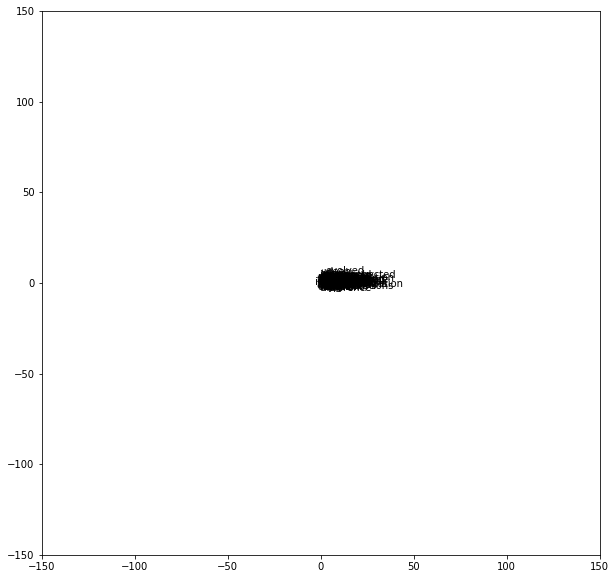

In [6]:
# ----------------------------------------------------------------------------
# Define TensorFlow ops and variable and invoke training
# ----------------------------------------------------------------------------
emb_dims = 128
learning_rate = 0.001
# ---------------------------------------------
# Placeholders for Input output
# ----------------------------------------------
x = tf.placeholder(tf.float32, [None, vocab_size])
y = tf.placeholder(tf.float32, [None, vocab_size])
# ---------------------------------------------
# Define the embedding matrix weights and a bias
# ----------------------------------------------
W = tf.Variable(tf.random_normal([vocab_size, emb_dims], mean=0.0, stddev=0.02, dtype=tf.float32))
b = tf.Variable(tf.random_normal([emb_dims], mean=0.0, stddev=0.02, dtype=tf.float32))
W_outer = tf.Variable(tf.random_normal([emb_dims, vocab_size], mean=0.0, stddev=0.02, dtype=tf.float32))
b_outer = tf.Variable(tf.random_normal([vocab_size], mean=0.0, stddev=0.02, dtype=tf.float32))

hidden = tf.add(tf.matmul(x, W), b)
logits = tf.add(tf.matmul(hidden, W_outer), b_outer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

epochs, batch_size = 100, 10
batch = len(x_train) // batch_size

# train for n_iter iterations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('was here')
    for epoch in range(epochs):
        batch_index = 0
        for batch_num in range(batch):
            x_batch = x_train[batch_index: batch_index + batch_size]
            y_batch = y_train[batch_index: batch_index + batch_size]
            sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})
            print('epoch:', epoch, 'loss :', sess.run(cost, feed_dict={x: x_batch, y: y_batch}))
    W_embed_trained = sess.run(W)
W_embedded = TSNE(n_components=2).fit_transform(W_embed_trained)
plt.figure(figsize=(10, 10))
for i in range(len(W_embedded)):
    plt.text(W_embedded[i, 0], W_embedded[i, 1], ind2word[i])

plt.xlim(-150, 150)
plt.ylim(-150, 150)
